DSI CC7 - Project 1 Notebook 2 - Analysis<br> 
Anne Kerr - SF

This notebook reads the combined SAT and ACT data for 2017 and 2018 and performs exploratory analysis, outlines outside research done, and provides a conclusion to the problem statement.

In [1]:
#load the data science libraries

import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy as sp
import math

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('../data/final.csv')

In [3]:
df.head()

,state,sat_participation_2017,sat_language_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_language_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,43,562,544,1106,33,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,29,577,572,1149,66,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1169,100,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,27,22.7


Exploratory Data Analysis
Summary Statistics
Transpose the output of pandas describe method to create a quick overview of each numeric feature.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_language_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


Write a function to calculate standard deviation using the formula above

In [5]:
def my_std_dev(ds):
    dsmean = ds.mean()
    var = []
    for x in ds:
        v = (x-dsmean)**2
        var.append(v)
    sd = np.sqrt((sum(var))/len(ds))
    return(sd)
    

#Test it agains the np vesion on a couple of columns
print(my_std_dev(df['act_reading_2017']))
print(np.std(df['act_reading_2017']))
print(my_std_dev(df['sat_total_2018']))
print(np.std(df['sat_total_2018']))
    

2.0469029314842646
2.0469029314842646
92.91994462540737
92.91994462540737


We were asked to use a dictionary comprehension to apply this function to each numeric column in the dataset. 


In [6]:
df.shape

(51, 17)

In [7]:
##This is adapted from a sample Li provided. I only changed the names 
## and the column slice selector 
##I was able to do this on my own using a for loop, but needed help with the list comprehension.

columns_stat = df.columns[1:].values

stat_dict = {col: float(df[[col]].apply(lambda x: my_std_dev(x))) for col in columns_stat}

stat_dict

{'sat_participation_2017': 34.92907076664508,
 'sat_language_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 3.151107895464408,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 37.63965409204986,
 'sat_language_2018': 44.87118561762388,
 'sat_math_2018': 48.40589946919447,
 'sat_total_2018': 92.91994462540737,
 'act_participation_2018': 33.745194881997506,
 'act_composite_2018': 2.0968220768561987}

I want to check the manually calculated standard deviations with the output from pandas describe() and with numpy's std method.

In [8]:
#Adapted from 
#https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = df.select_dtypes(include=numerics).columns

for i in numeric_columns:
    print( '{} std dev is {}'.format(i, np.std(df[i]) ))

sat_participation_2017 std dev is 34.92907076664508
sat_language_2017 std dev is 45.21697020437866
sat_math_2017 std dev is 46.65713364485503
sat_total_2017 std dev is 91.58351056778743
act_participation_2017 std dev is 31.824175751231806
act_english_2017 std dev is 2.3304876369363363
act_math_2017 std dev is 1.9624620273436781
act_reading_2017 std dev is 2.0469029314842646
act_science_2017 std dev is 3.151107895464408
act_composite_2017 std dev is 2.000786081581989
sat_participation_2018 std dev is 37.63965409204986
sat_language_2018 std dev is 44.87118561762388
sat_math_2018 std dev is 48.40589946919447
sat_total_2018 std dev is 92.91994462540737
act_participation_2018 std dev is 33.745194881997506
act_composite_2018 std dev is 2.0968220768561987


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_language_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


My function matches numpy, but df.describe is a bit different. This is because Pandas uses n-1 in the denominator and numpy does not.

## Investigate trends in the data
Using sorting and/or masking (along with the .head method to not print the entire dataframe, we were to consider the following questions:

Which states have the highest and lowest participation rates for the:
2017 SAT?
2018 SAT?
2017 ACT?
2018 ACT?
Which states have the highest and lowest mean total/composite scores for the:
2017 SAT?
2018 SAT?
2017 ACT?
2018 ACT?
Do any states with 100% participation on a given test have a rate change year-to-year?
Do any states show have >50% participation on both tests either year?


In [10]:
df.columns

Index(['state', 'sat_participation_2017', 'sat_language_2017', 'sat_math_2017',
       'sat_total_2017', 'act_participation_2017', 'act_english_2017',
       'act_math_2017', 'act_reading_2017', 'act_science_2017',
       'act_composite_2017', 'sat_participation_2018', 'sat_language_2018',
       'sat_math_2018', 'sat_total_2018', 'act_participation_2018',
       'act_composite_2018'],
      dtype='object')

In [11]:
part_rate = 100
#Create dataframes with only the rows that match the participate rate criteria
df100_sat17 = df[df.sat_participation_2017 == part_rate]
df100_sat18 = df[df.sat_participation_2018 == part_rate]
df100_act17 = df[df.act_participation_2017 == part_rate]
df100_act18 = df[df.act_participation_2018 == part_rate]

In [12]:
print(f'States with {part_rate}% SAT Participation - 2017')
df100_sat17

States with 100% SAT Participation - 2017


,state,sat_participation_2017,sat_language_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_language_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,26,25.6
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,17,23.8
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,92,497,480,977,32,23.6
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1011,22,24.4


In [13]:
print(f'States with {part_rate}% SAT Participation - 2018')
df100_sat18

States with 100% SAT Participation - 2018


,state,sat_participation_2017,sat_language_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_language_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,100,519,506,1025,30,23.9
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,26,25.6
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,17,23.8
12,Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,100,508,493,1001,36,22.3
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1011,22,24.4


In [14]:
print(f'States with {part_rate}% ACT Participation - 2017')
df100_act17

States with 100% ACT Participation - 2017


,state,sat_participation_2017,sat_language_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_language_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1169,100,19.4
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,100,519,506,1025,30,23.9
17,Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,4,630,618,1248,100,20.2
18,Louisiana,4,611,586,1198,100,19.4,18.8,19.8,19.6,19.5,4,615,595,1210,100,19.2
23,Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,4,643,655,1298,99,21.3
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,3,630,606,1236,100,18.6
25,Missouri,3,640,631,1271,100,19.8,19.9,20.8,20.5,20.4,4,633,629,1262,100,20.0
26,Montana,10,605,591,1196,100,19.0,20.2,21.0,20.5,20.3,10,606,592,1198,100,20.0
28,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,23,574,566,1140,100,17.7


In [15]:
print(f'States with {part_rate}% ACT Participation - 2018')
df100_act18

States with 100% ACT Participation - 2018


,state,sat_participation_2017,sat_language_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_language_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1169,100,19.4
17,Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,4,630,618,1248,100,20.2
18,Louisiana,4,611,586,1198,100,19.4,18.8,19.8,19.6,19.5,4,615,595,1210,100,19.2
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,3,630,606,1236,100,18.6
25,Missouri,3,640,631,1271,100,19.8,19.9,20.8,20.5,20.4,4,633,629,1262,100,20.0
26,Montana,10,605,591,1196,100,19.0,20.2,21.0,20.5,20.3,10,606,592,1198,100,20.0
27,Nebraska,3,629,625,1253,84,20.9,20.9,21.9,21.5,21.4,3,629,623,1252,100,20.1
28,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,23,574,566,1140,100,17.7
33,North Carolina,49,546,535,1081,100,17.8,19.3,19.6,19.3,19.1,52,554,543,1097,100,19.1


Listing states with 100 percent participation rates shows that there are more states with 100% participation on the ACT than on the SAT. Let's try to visualize them and see what we find. 

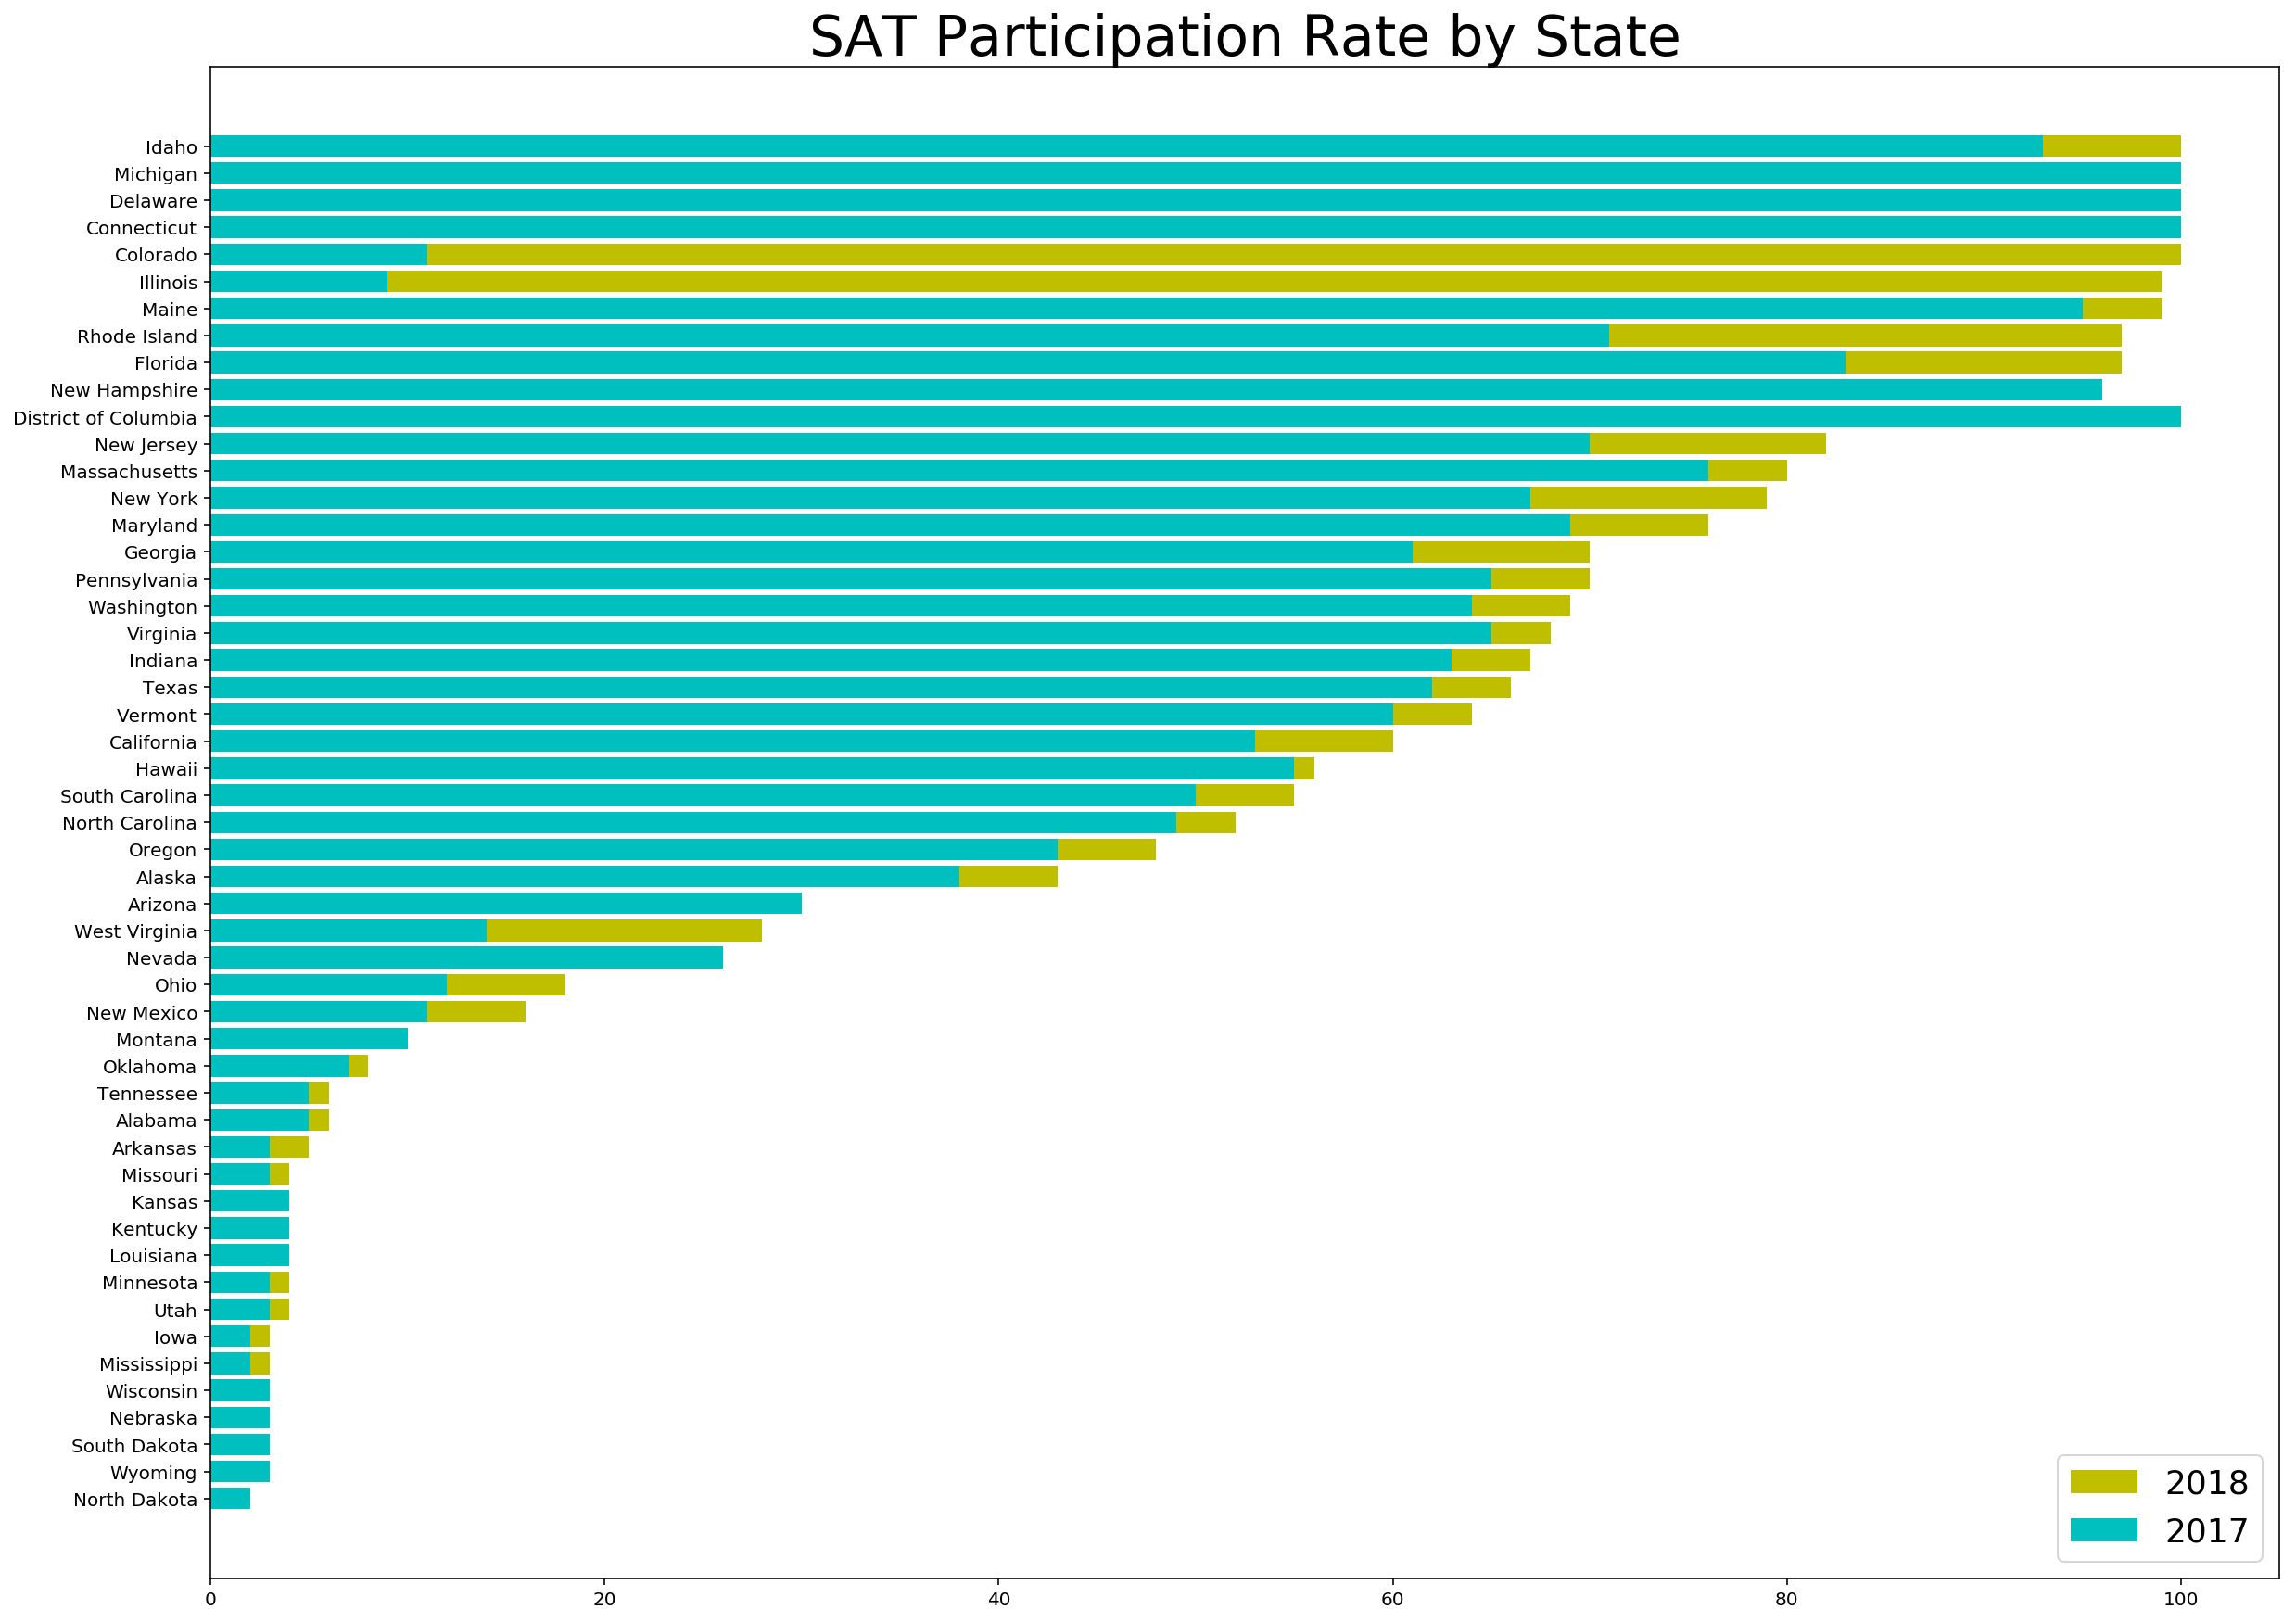

In [16]:
###### Bar chart to show participation rates by state
#Note: Mark pointed out that the below didn't work because because 
#only the values were sorted, not the states.
#plt.barh(df.State, df.Participation.sort_values(ascending=False) )
# plt.barh(df_sorted.state, list(df_sorted.sat_participation_2017) )
    
plt.figure(figsize=(20,15))    
# Add a title and show the plot.
plt.title('SAT Participation Rate by State', fontsize=30)
plt.rc('font', size=15)


df_sorted_sat_18 = df.sort_values(by='sat_participation_2018', ascending=True)
plt.barh(df_sorted_sat_18.state, list(df_sorted_sat_18.sat_participation_2018), color='y' )
#plt.legend(labels='2018')

df_sorted_sat_17 = df.sort_values(by='sat_participation_2017', ascending=True)
plt.barh(df_sorted_sat_17.state, list(df_sorted_sat_17.sat_participation_2017), color='c' )
plt.legend(labels=['2018', '2017'], loc=('lower right'), fontsize='large');
#saving this one for use in the presentation
plt.savefig('./sat-compare-bystate.jpg');

Plotting participation rates from 2017 over 2018 shows that quite a few states increased radically from 2017 to 2018. These are Colorado and Illinois, two states that changed their mandatory requirement from ACT to SAT for the class of 2018.

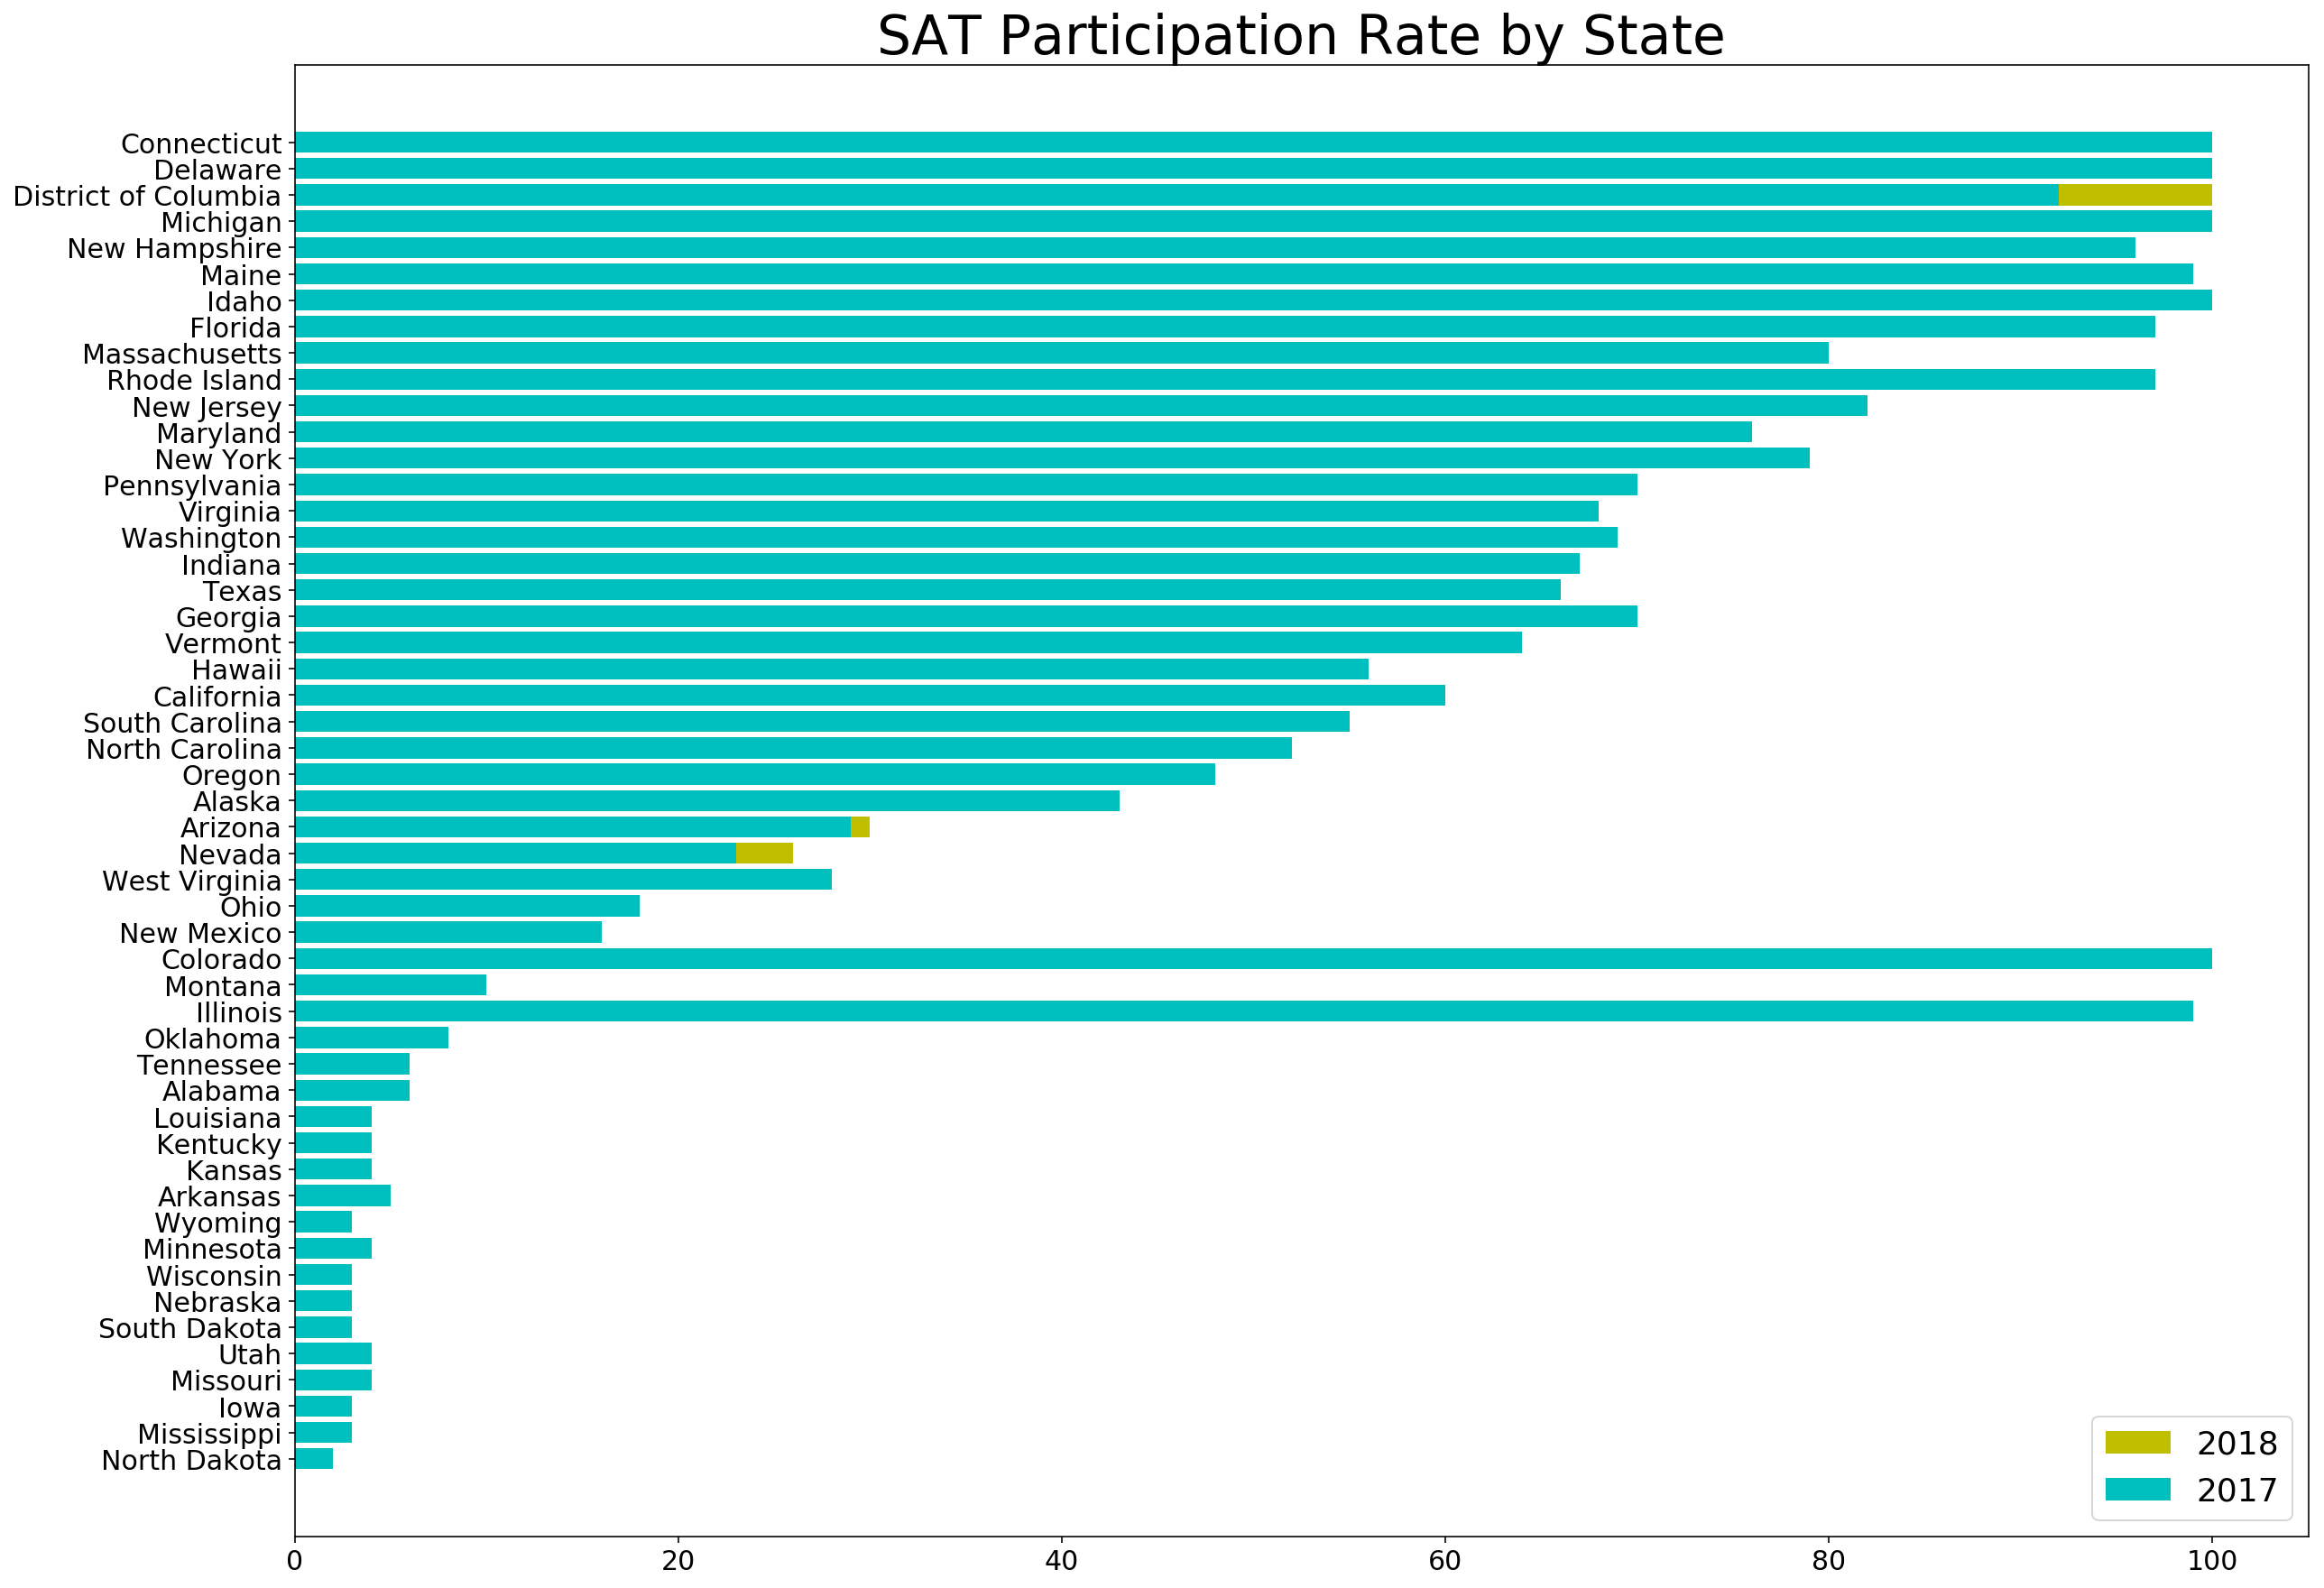

In [17]:
plt.figure(figsize=(20,15))    
# Add a title and show the plot.
plt.title('SAT Participation Rate by State', fontsize=30)
plt.rc('font', size=15)

df_sorted_sat_17 = df.sort_values(by='sat_participation_2017', ascending=True)
plt.barh(df_sorted_sat_17.state, list(df_sorted_sat_17.sat_participation_2017), color='y')

df_sorted_sat_18 = df.sort_values(by='sat_participation_2018', ascending=True)
plt.barh(df_sorted_sat_18.state, list(df_sorted_sat_18.sat_participation_2018), color='c');
plt.legend(labels=['2018', '2017'], loc=('lower right'), fontsize='large');


Plotting participation rates from 2018 over 2017 shows that DC increased to 100% from a pretty high rate already.

Create a new column to holds the change of participation rate from 2017 to 2018. 

In [18]:
df['sat_part_delta'] = df['sat_participation_2018']  - df['sat_participation_2017']
df['act_part_delta'] = df['act_participation_2018']  - df['act_participation_2017']
df_sorted_delta = df.sort_values(by='sat_part_delta', ascending=True)
df_sorted_delta_act = df.sort_values(by='act_part_delta', ascending=True)

The change in participation rate will be plotted below.

The above calculates a new column for each test that contains the change of participation rate from 2017 to 2018. These will be plotted below.

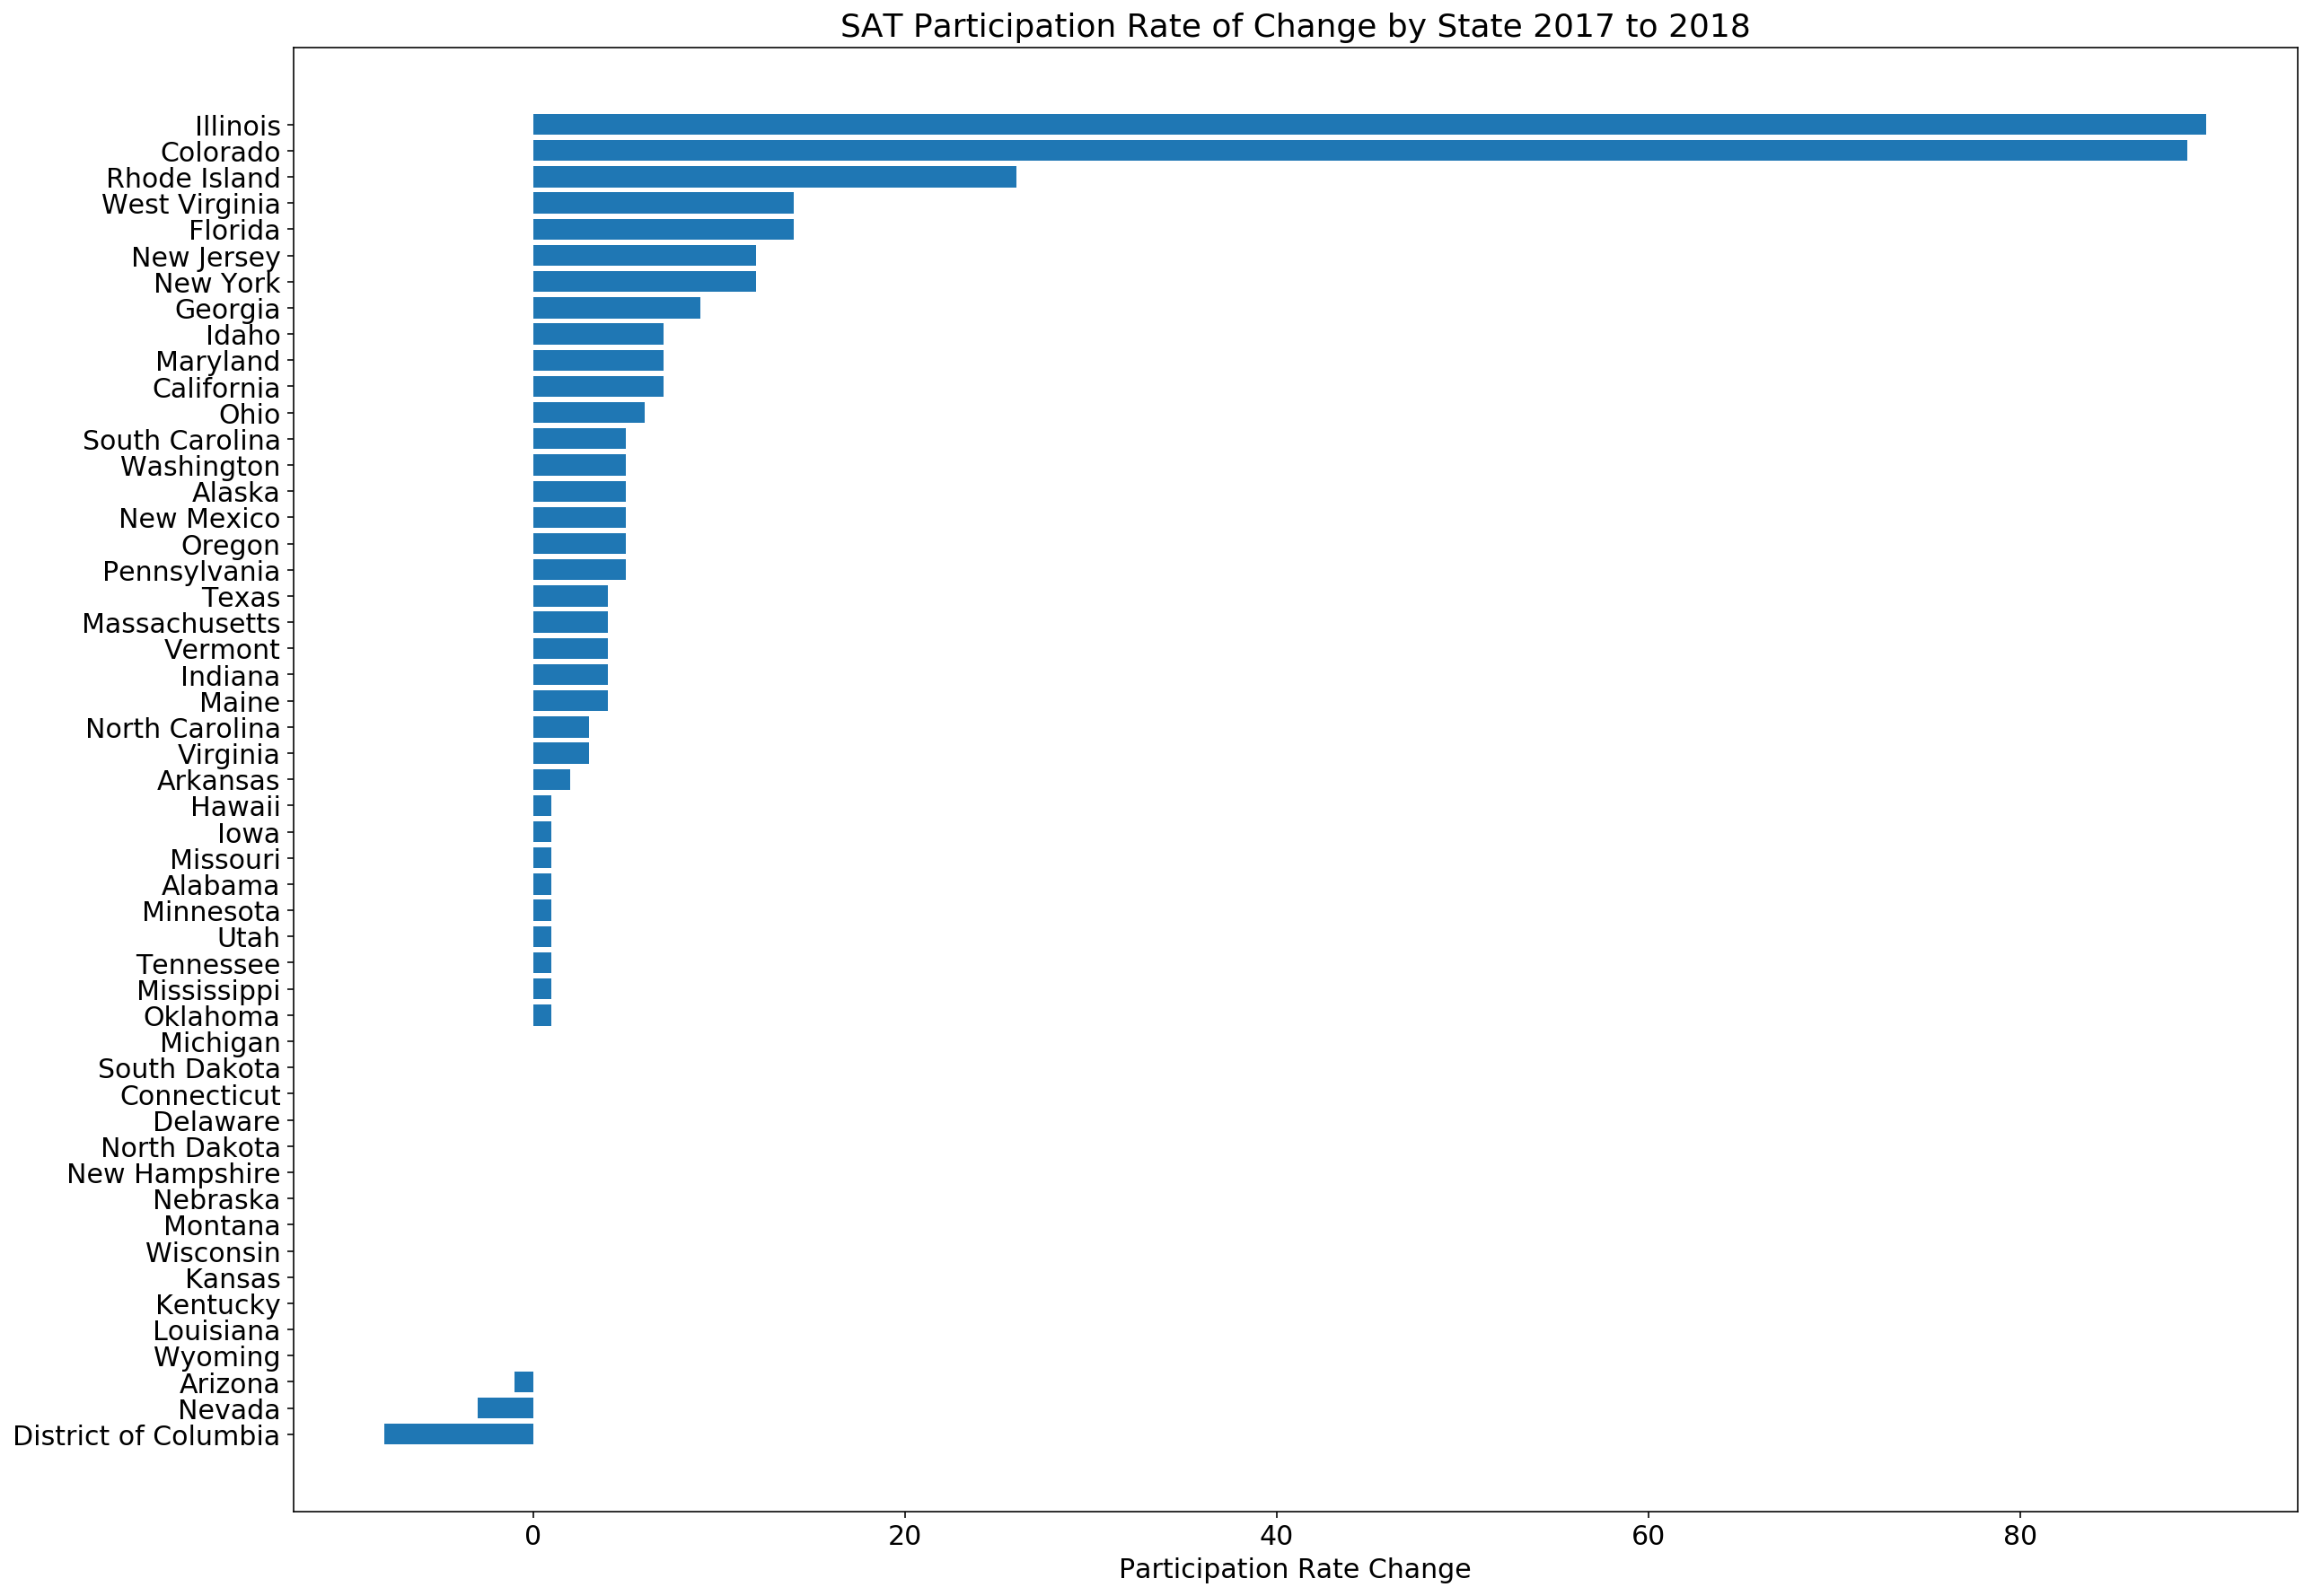

In [19]:
plt.figure(figsize=(20,15))    
plt.rc('font', size=15)
plt.title('SAT Participation Rate of Change by State 2017 to 2018')
plt.xlabel('Participation Rate Change')
plt.barh(df_sorted_delta.state, list(df_sorted_delta.sat_part_delta));

The above clearly shows the drastic increase in SAT participation for Colorado and Illinois, which makes sense, because the SAT became a graduation requirement for the class of 2018 in both of those states. It also illustrates that many states increased SAT participation in general. A few stayed the same. Only DC, Nevada, and Arizona decreased.

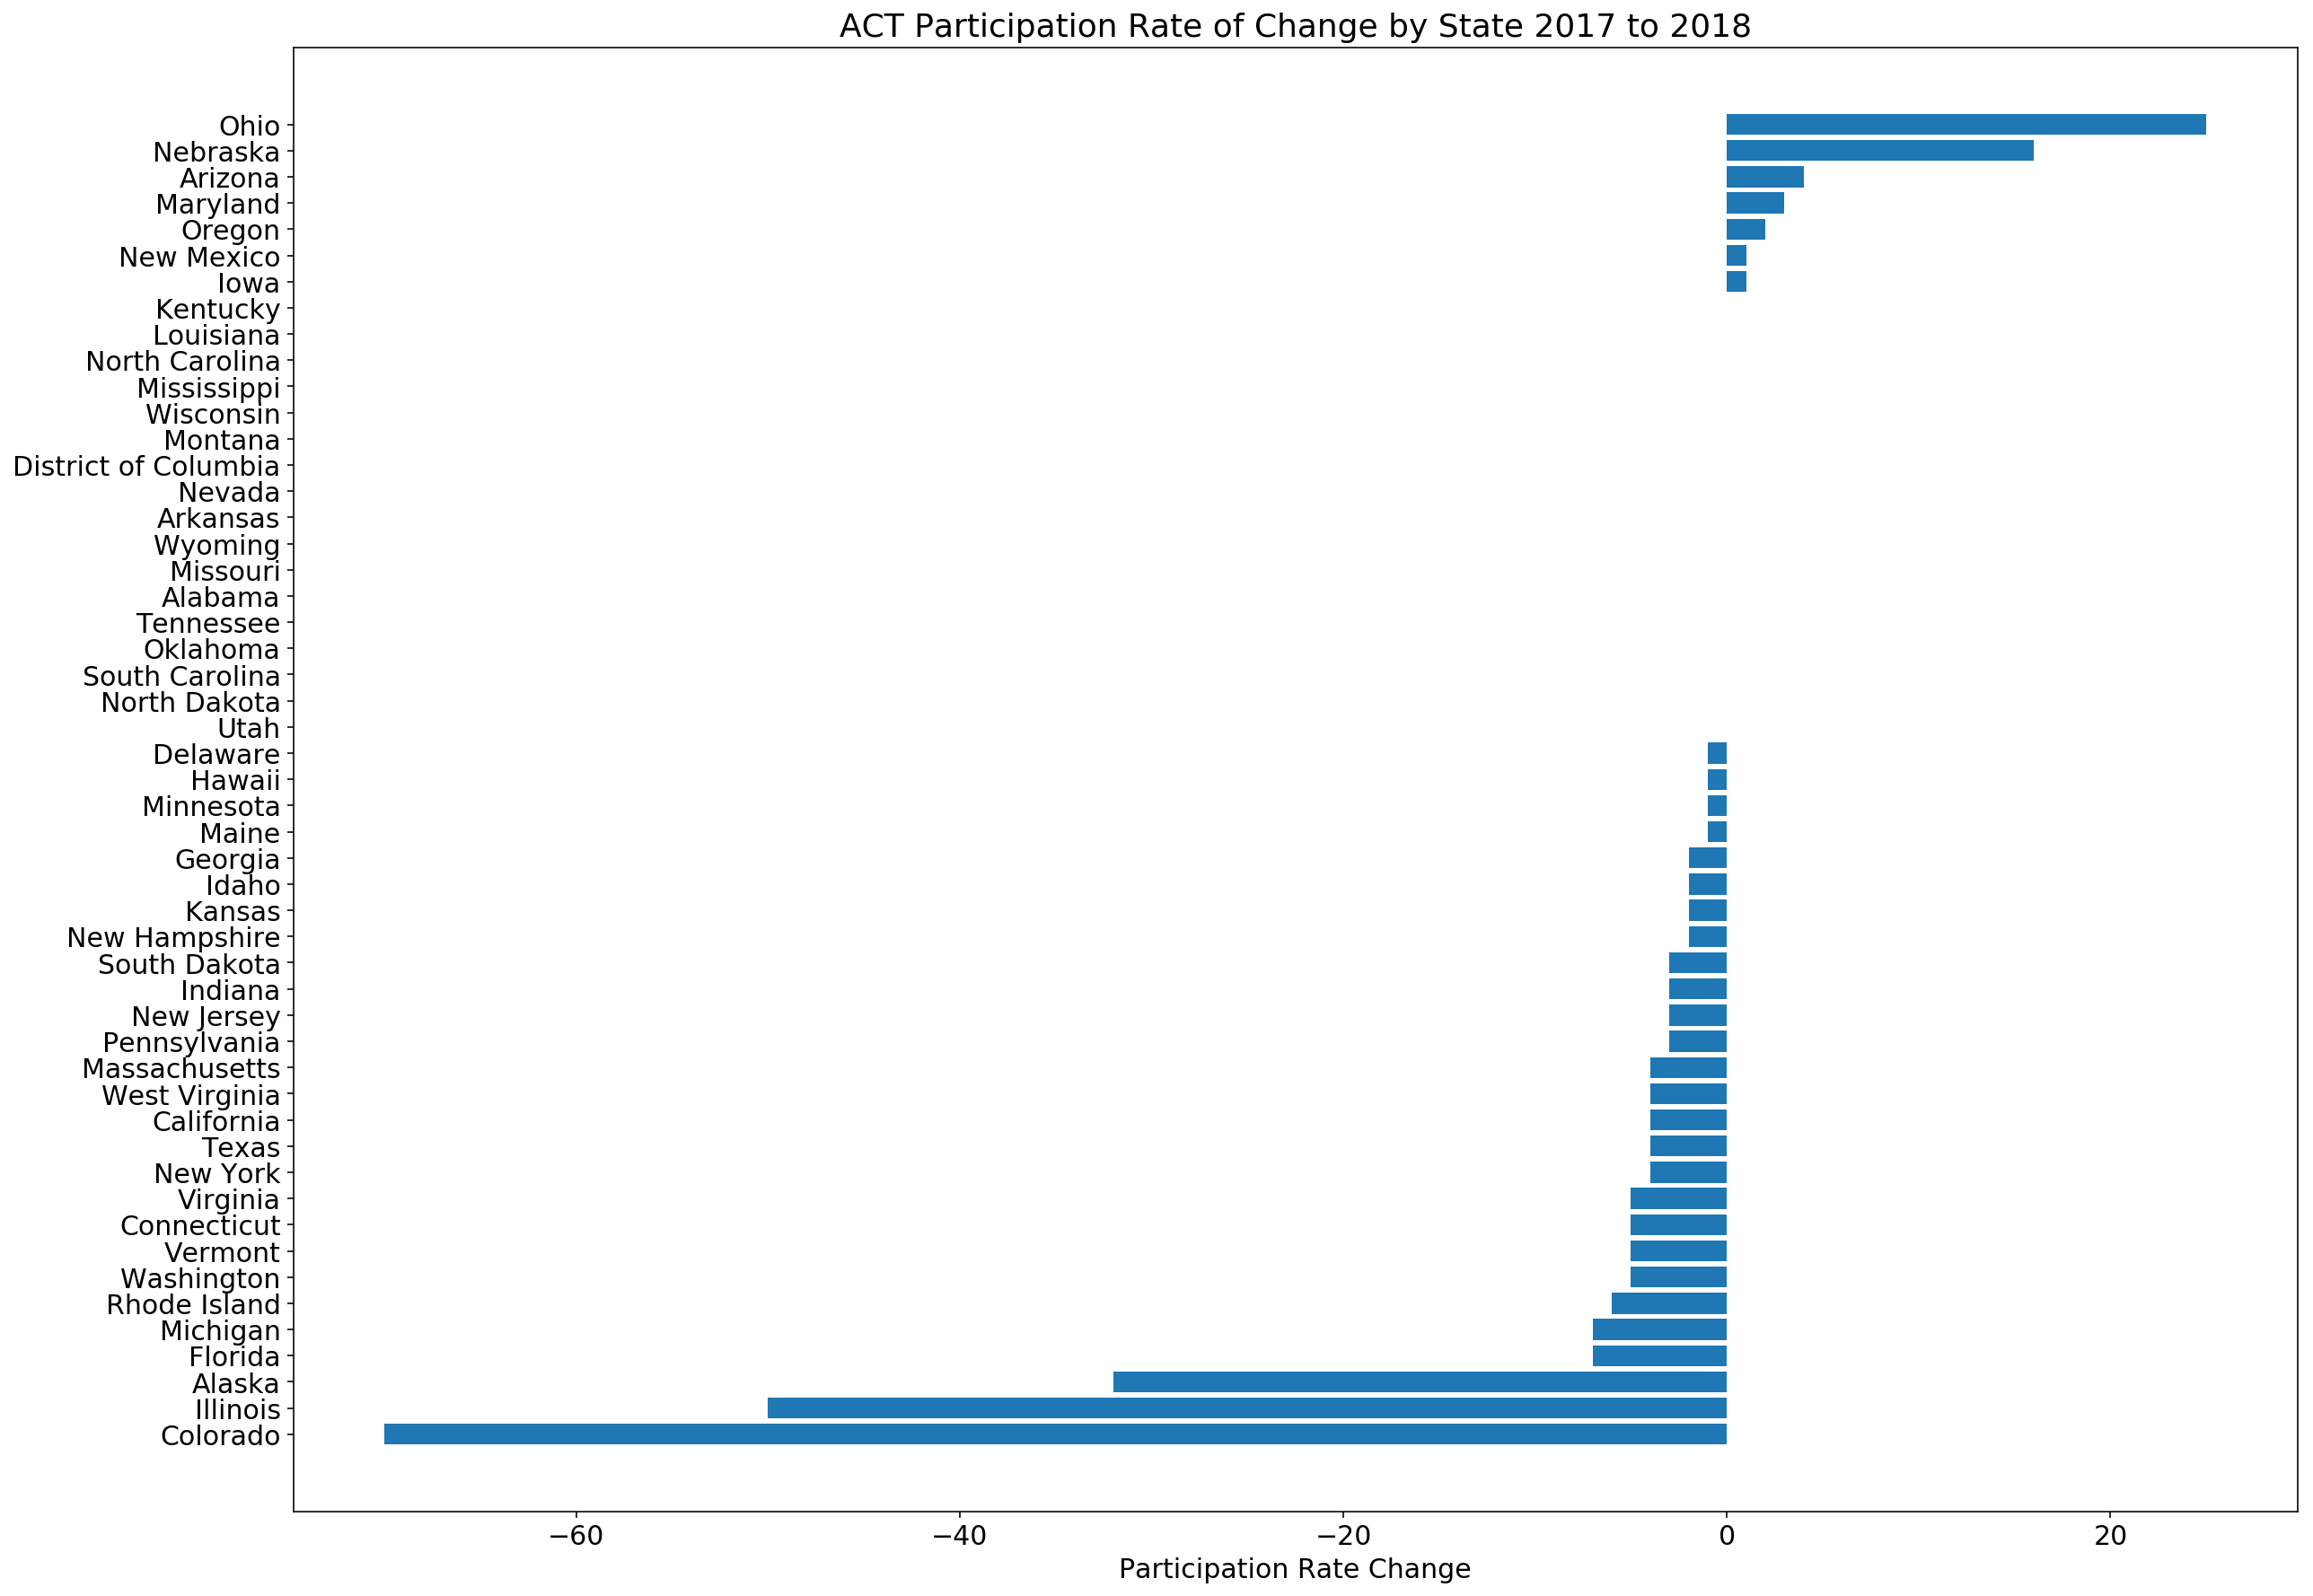

In [20]:
plt.figure(figsize=(20,15))    
plt.rc('font', size=15)
plt.title('ACT Participation Rate of Change by State 2017 to 2018')
plt.xlabel('Participation Rate Change')
plt.barh(df_sorted_delta_act.state, list(df_sorted_delta_act.act_part_delta));

In contrast, many states experienced decline in ACT participation. Ohio and Nebraska experienced the biggest increase. I may want to look into why that happened. The biggest decreases in ACT participation were in Colorado and Illinois, the two states that implemented mandatory SAT for the class of 2018.

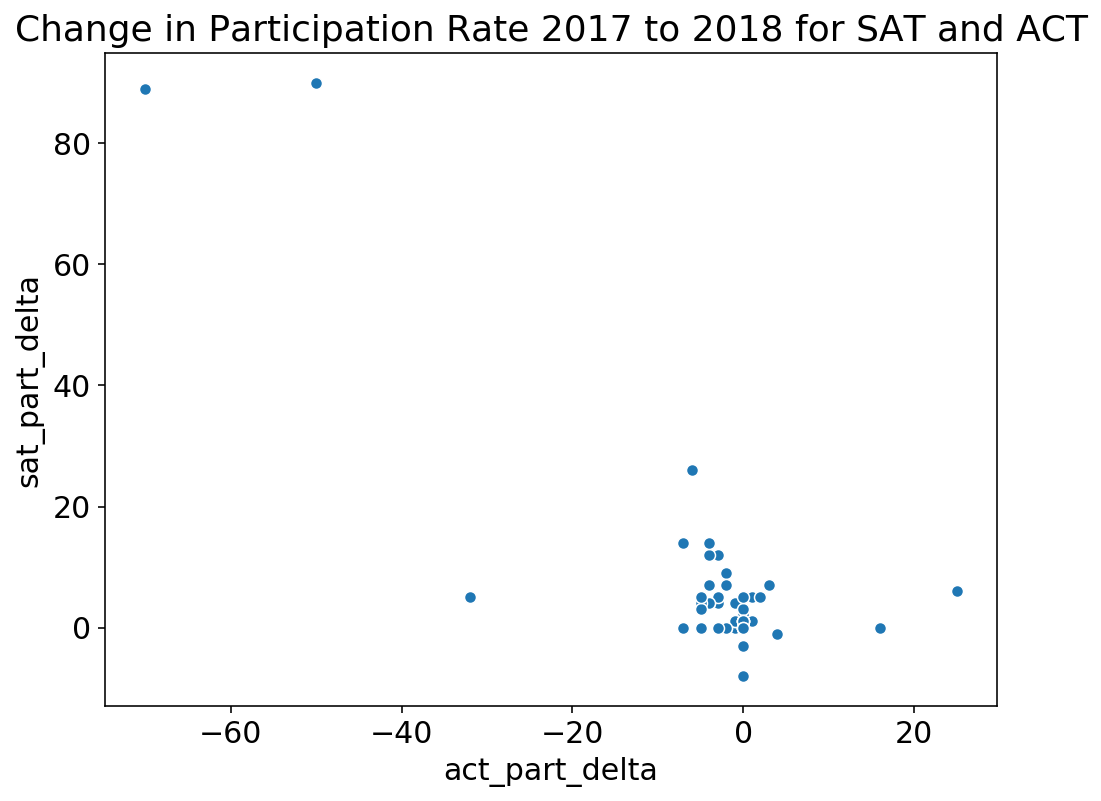

In [21]:
plt.figure(figsize=(8,6))

# Create two plots. (1 rows, 2 column, referring to 1st plot)
#plt.subplot(1, 2, 1)

plt.title('Change in Participation Rate 2017 to 2018 for SAT and ACT')
sns.scatterplot(x=df.act_part_delta, y=df.sat_part_delta, legend='full');


The above is a scatter plot that shows the realtionship between the changes in SAT and ACT participation.

### Visualizing the data

In this section I will visualize the data several different ways to discover patterns not obvious by looking at the numbers directly.

A heatmap of the correlations between the variables will help us visualize the relationships between them.

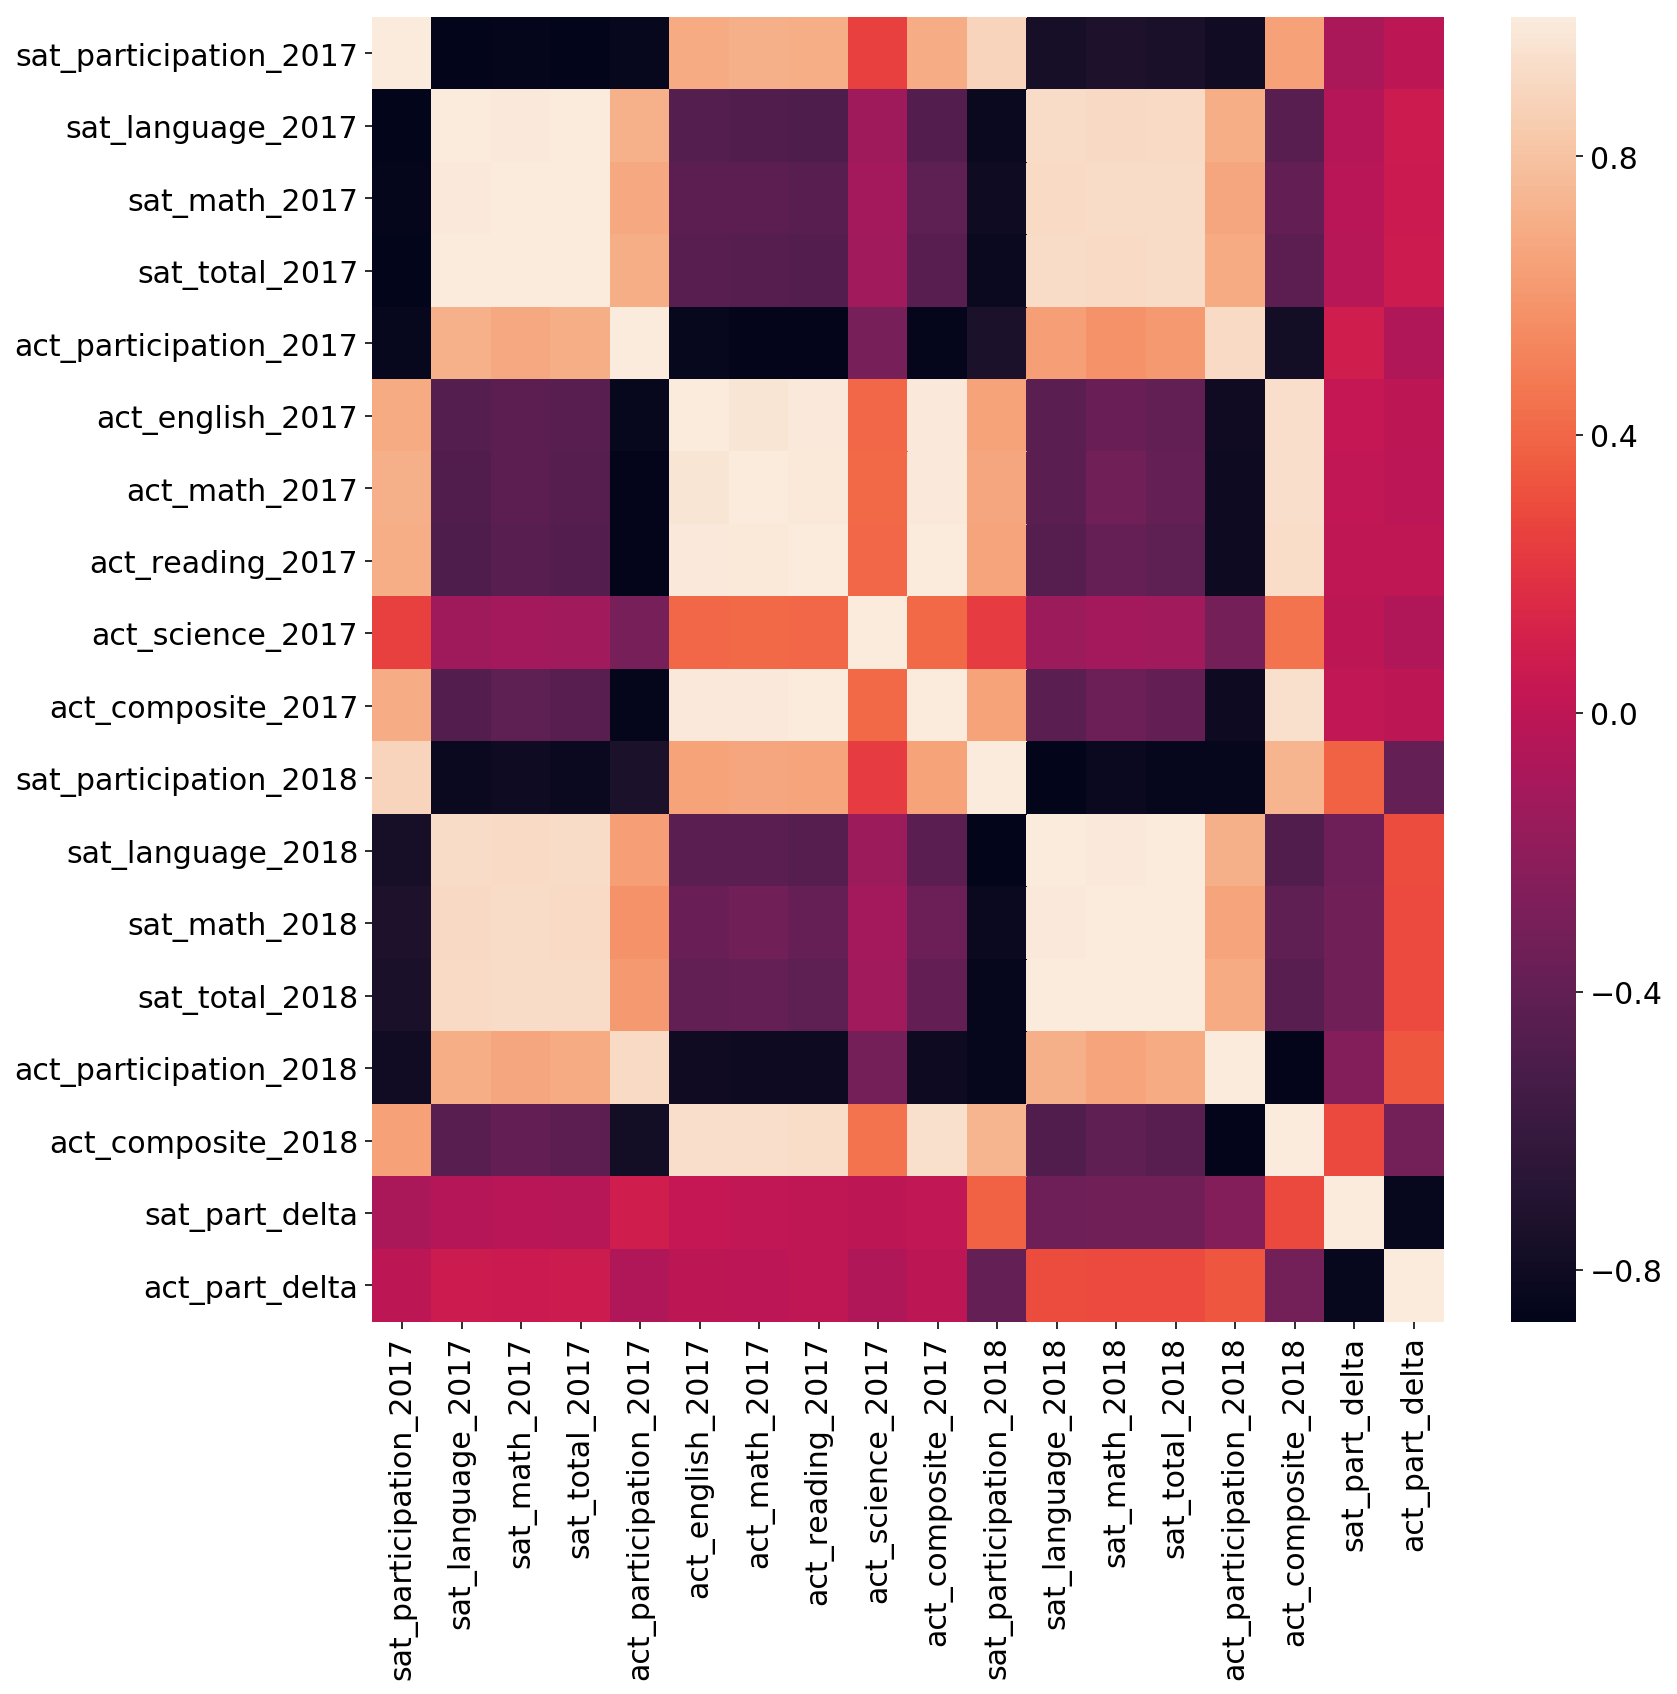

In [22]:
plt.figure(figsize=(12,12))

sns.heatmap(df.corr());

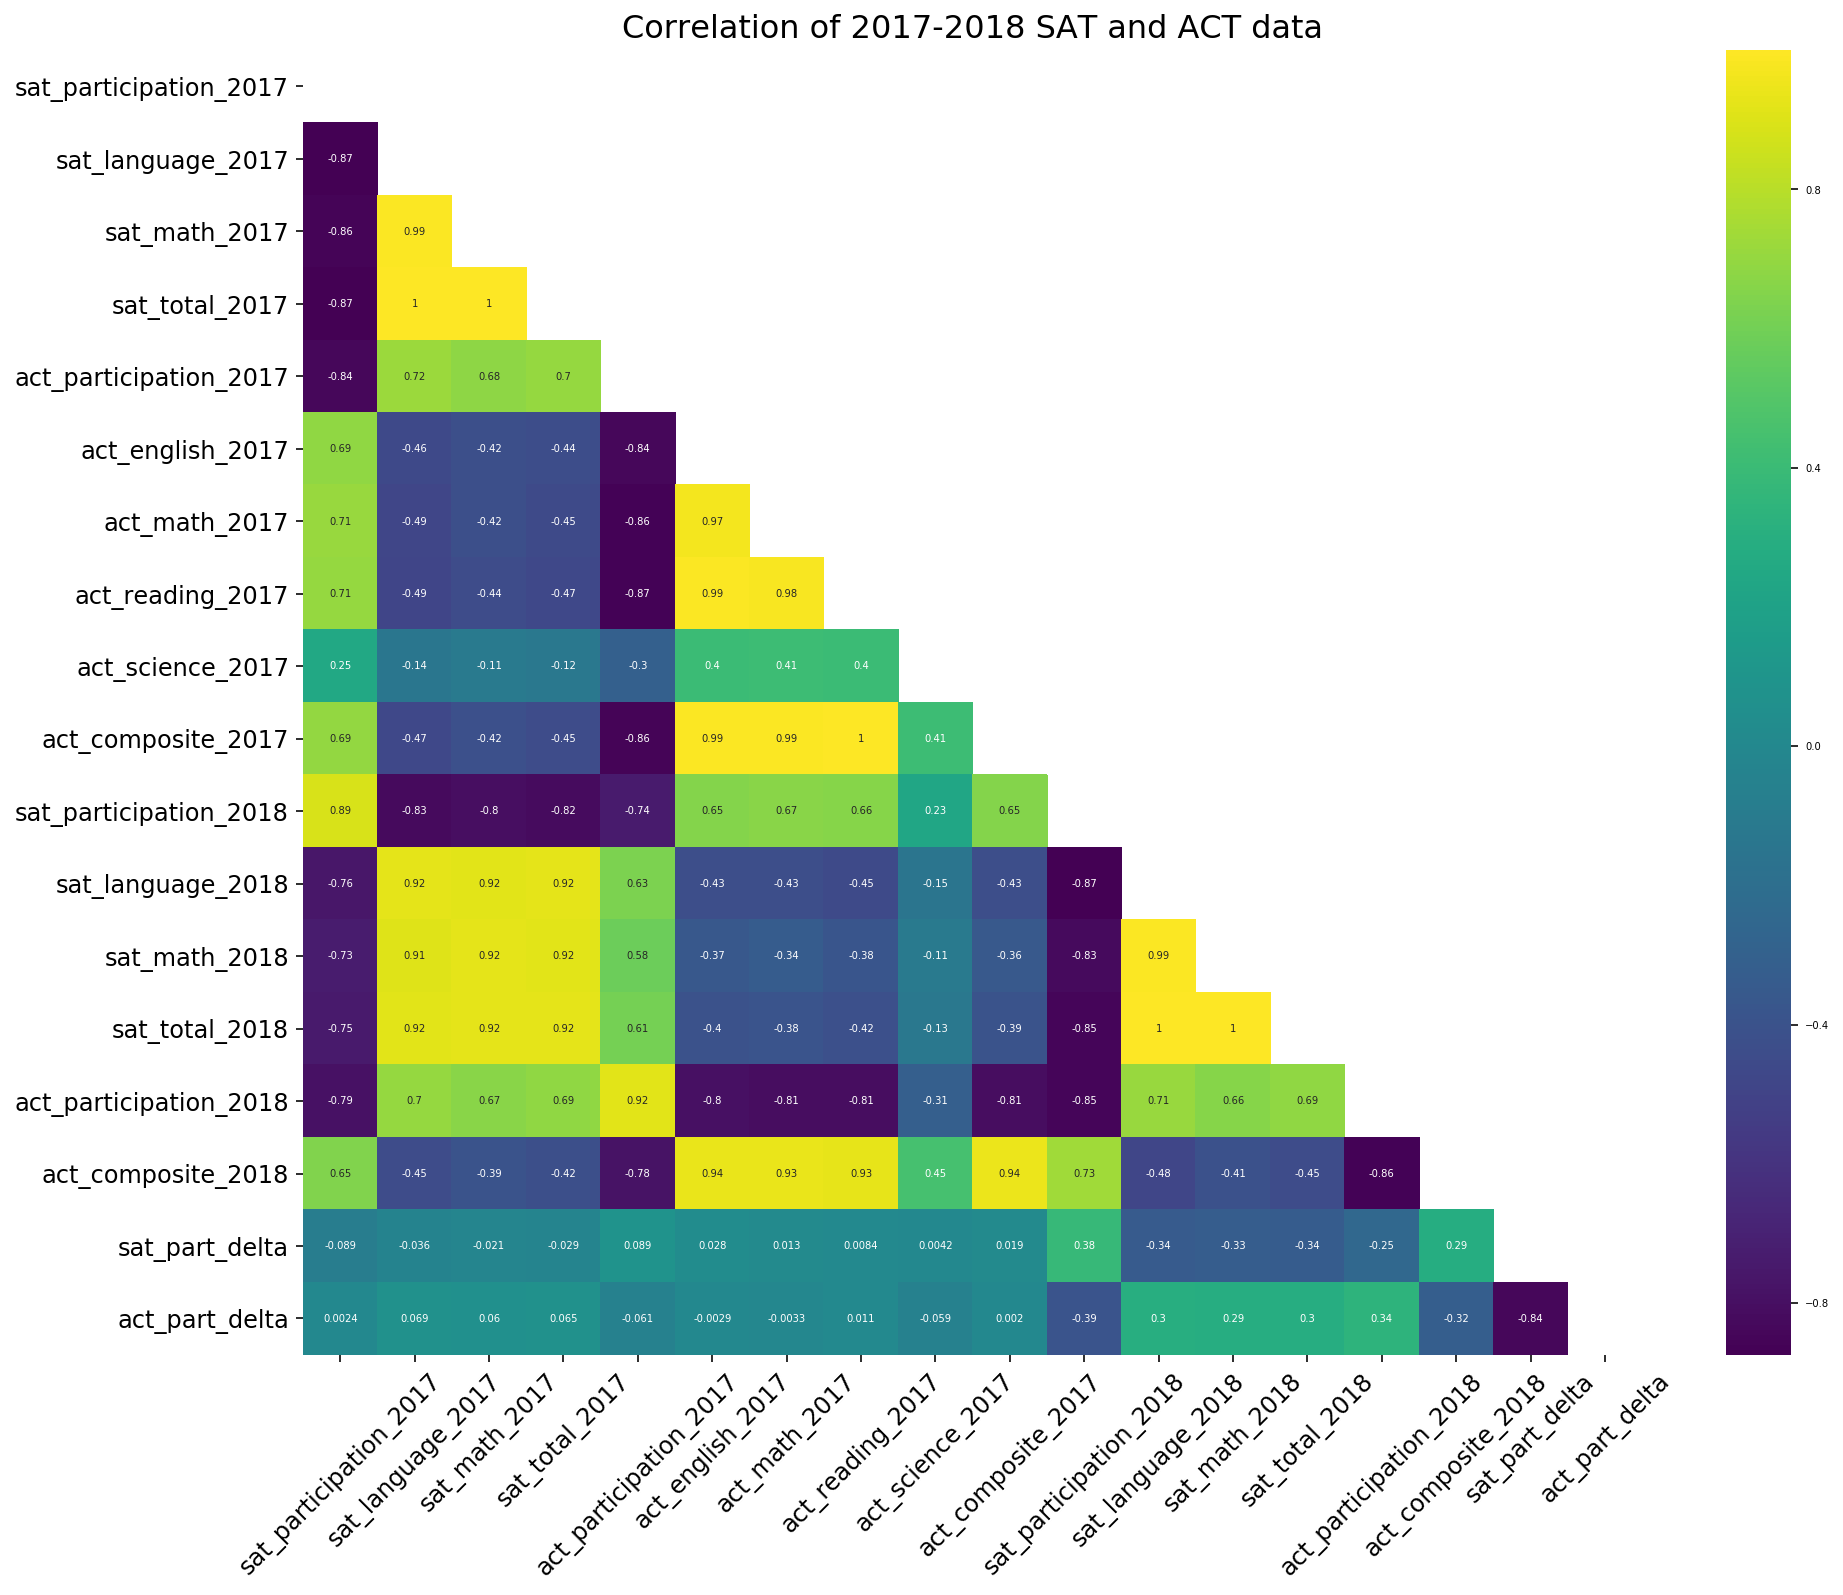

In [23]:
##from JP Harrison, based on class example
plt.rc('font', size='5')
### Got the below from 
plt.figure(figsize=(15,12))

g_mask = np.zeros_like(df.corr(), dtype=np.bool)

g_mask[np.triu_indices_from(g_mask)] = True

g_hm = sns.heatmap(df.corr(), cmap='viridis',annot=True, mask=g_mask);

g_hm.set_title('Correlation of 2017-2018 SAT and ACT data', fontsize='16')

g_hm.tick_params(axis='both,labelsize=12')

g_hm.tick_params(axis='x',labelsize=12,labelrotation=45)

g_hm.tick_params(axis='y',labelsize=12,labelrotation=0);

The pairplot function is another way to visualize these relationships:

<Figure size 864x864 with 0 Axes>

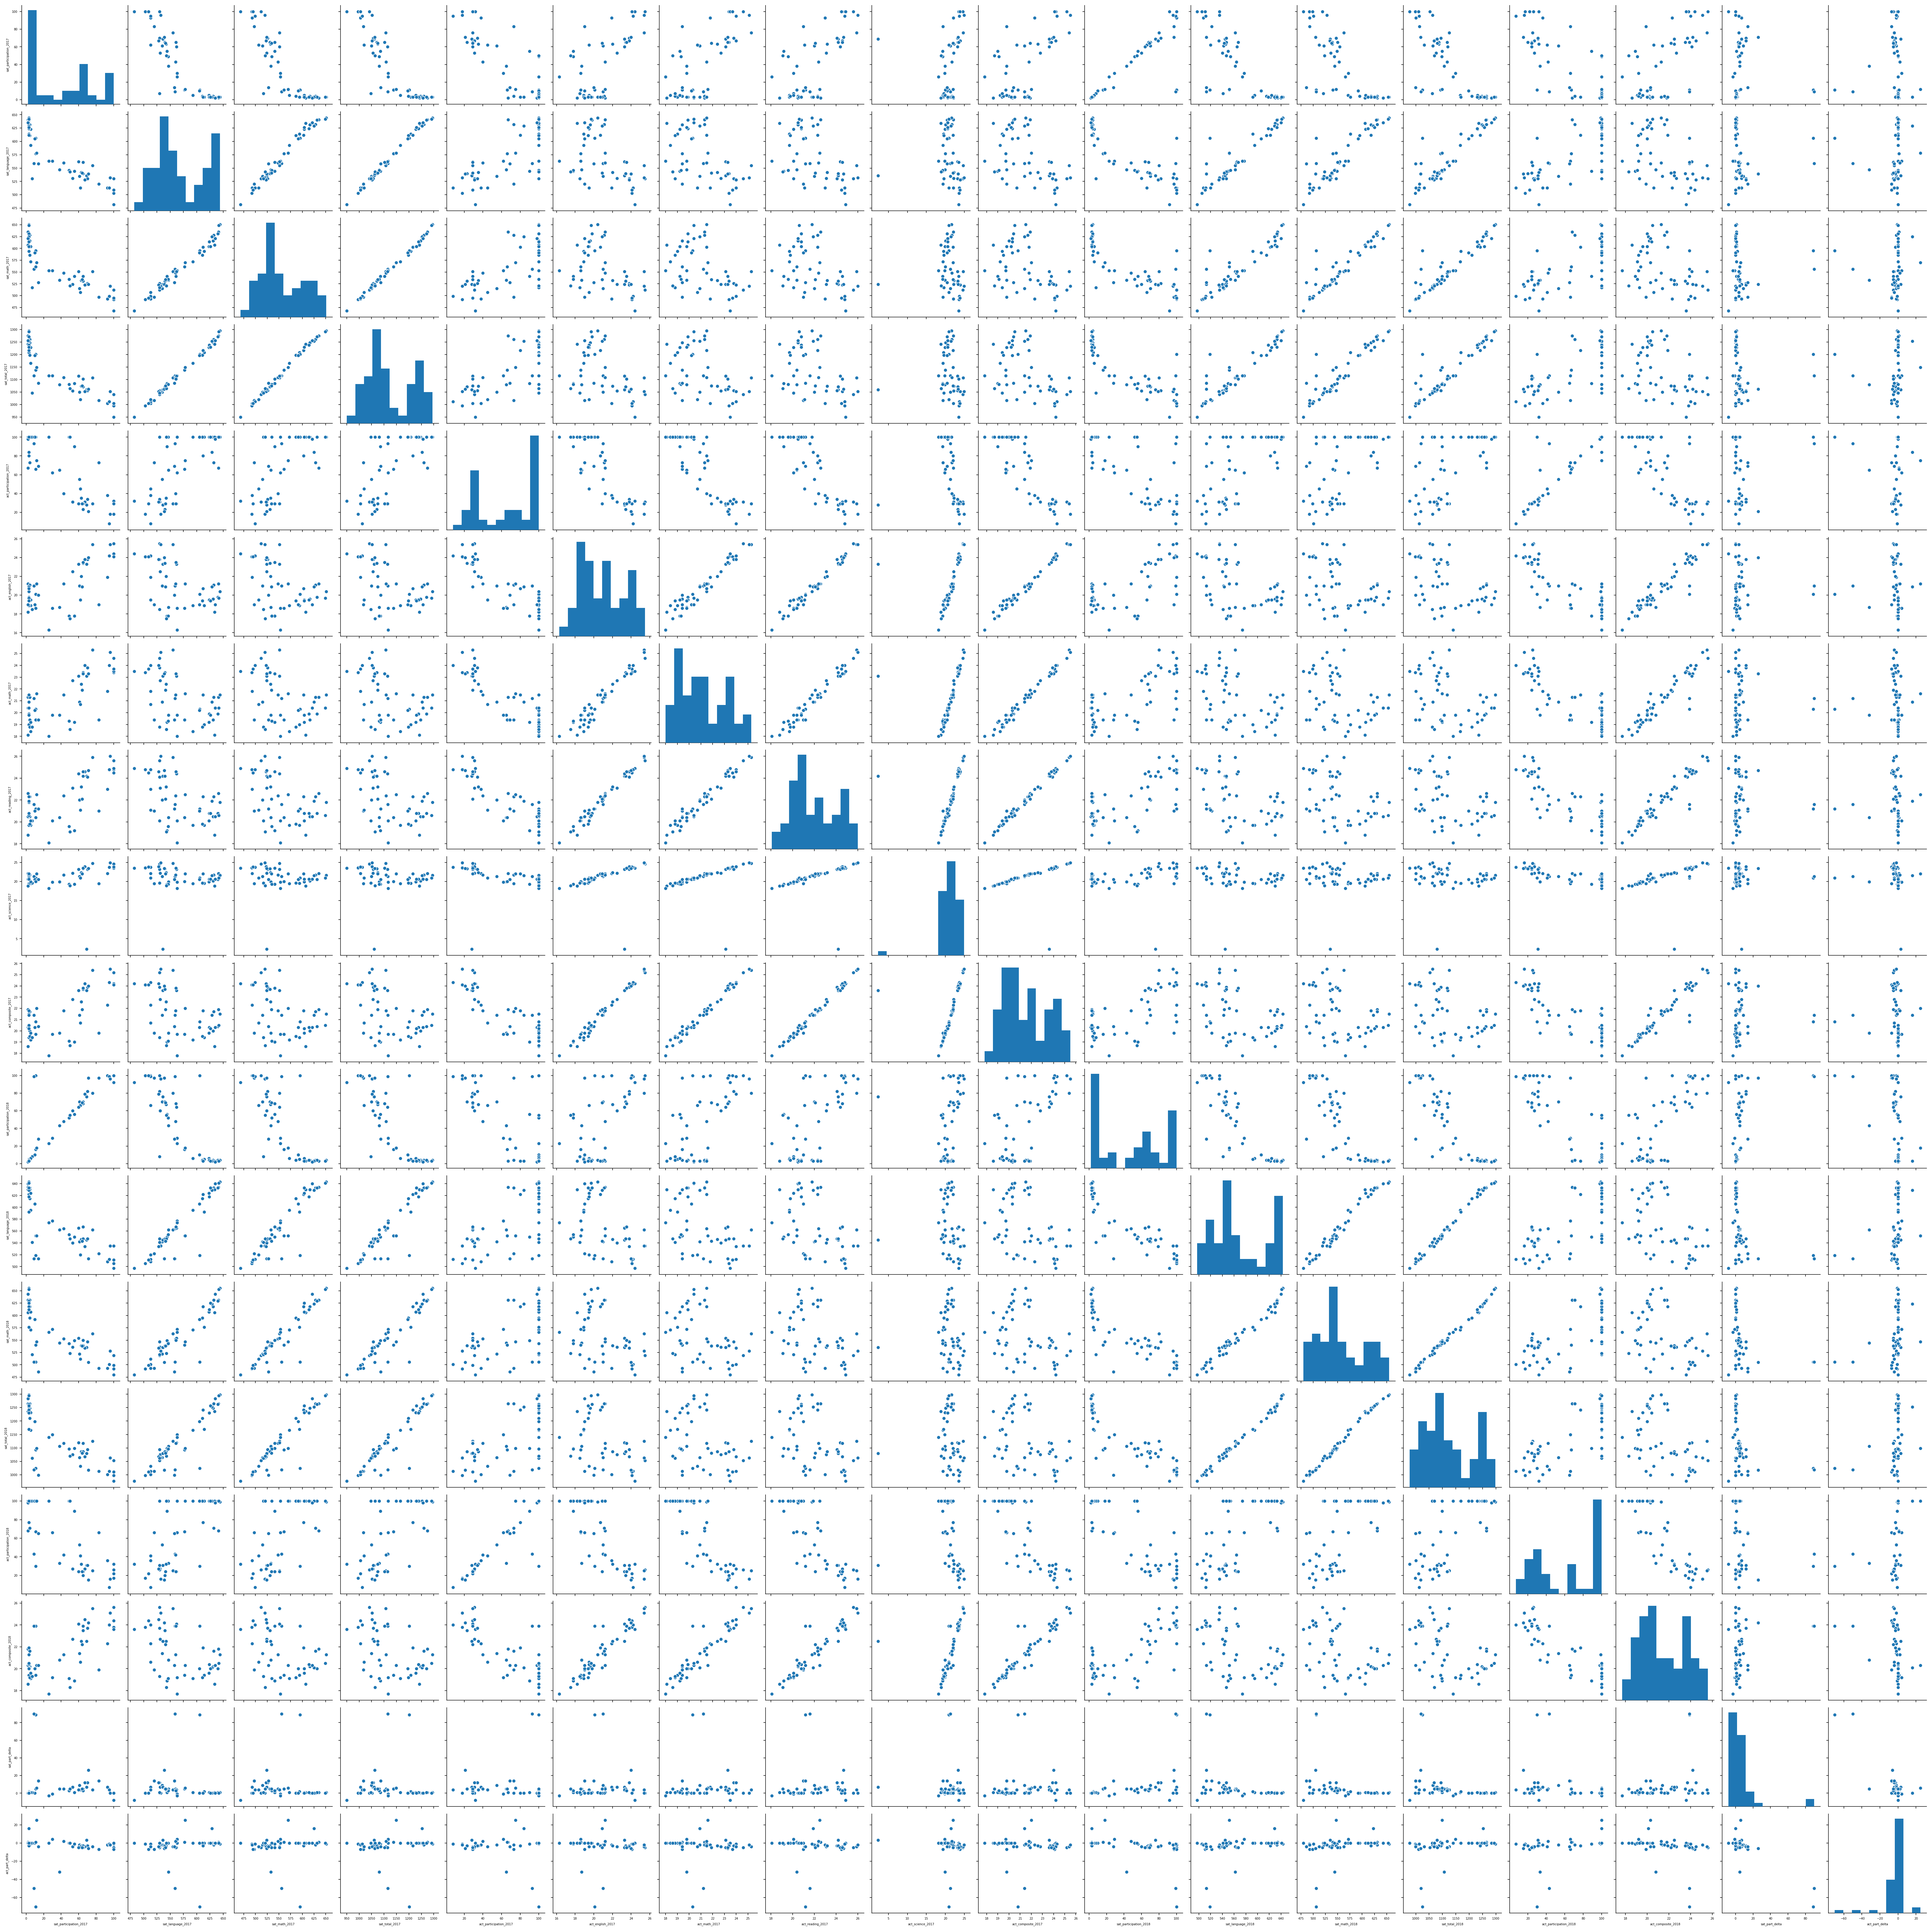

In [24]:
plt.figure(figsize=(12,12))
sns.pairplot(df);

That is a lot to look at, so I decided to run the pairplot on jsut the totals and the participation rates.

<Figure size 864x864 with 0 Axes>

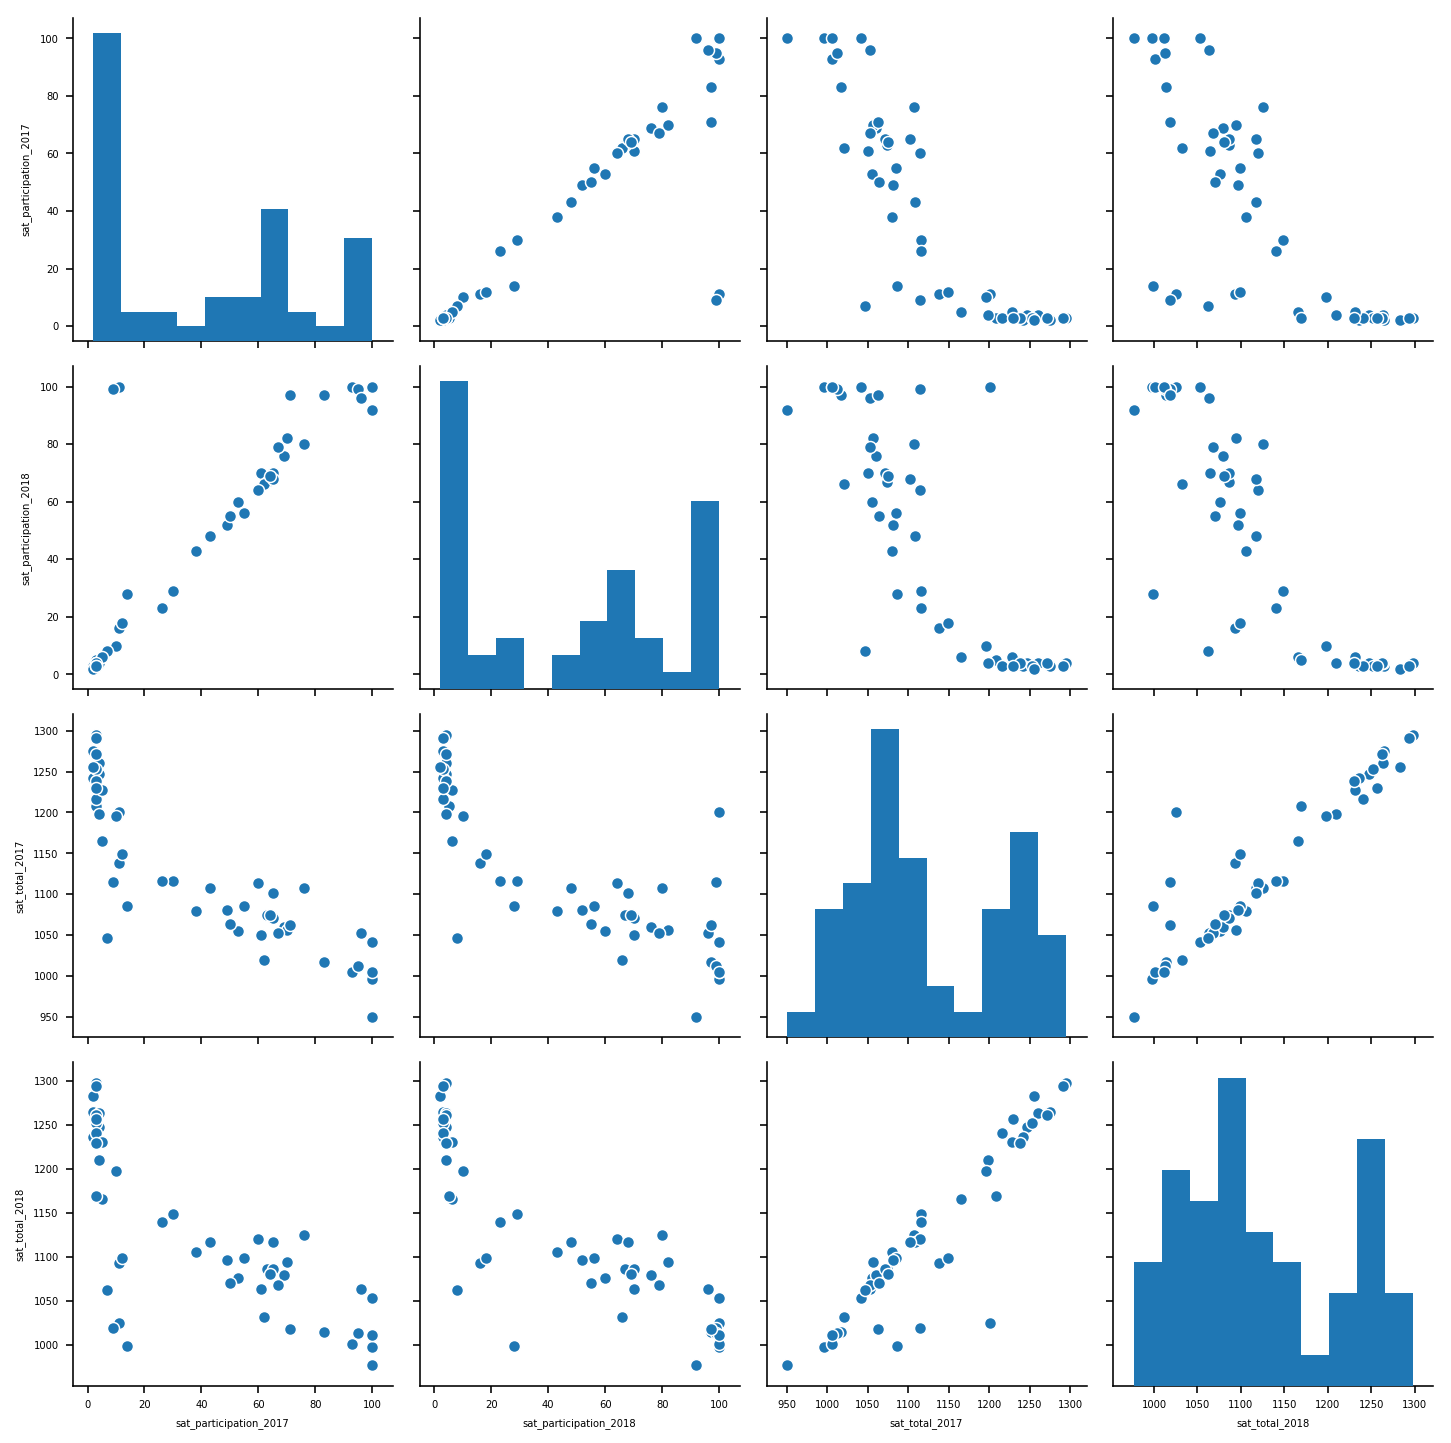

In [25]:
dfsubsat = df[['state', 'sat_participation_2017', 'sat_participation_2018', 'sat_total_2017', 'sat_total_2018']]
plt.figure(figsize=(12,12))
sns.pairplot(dfsubsat);



<Figure size 864x864 with 0 Axes>

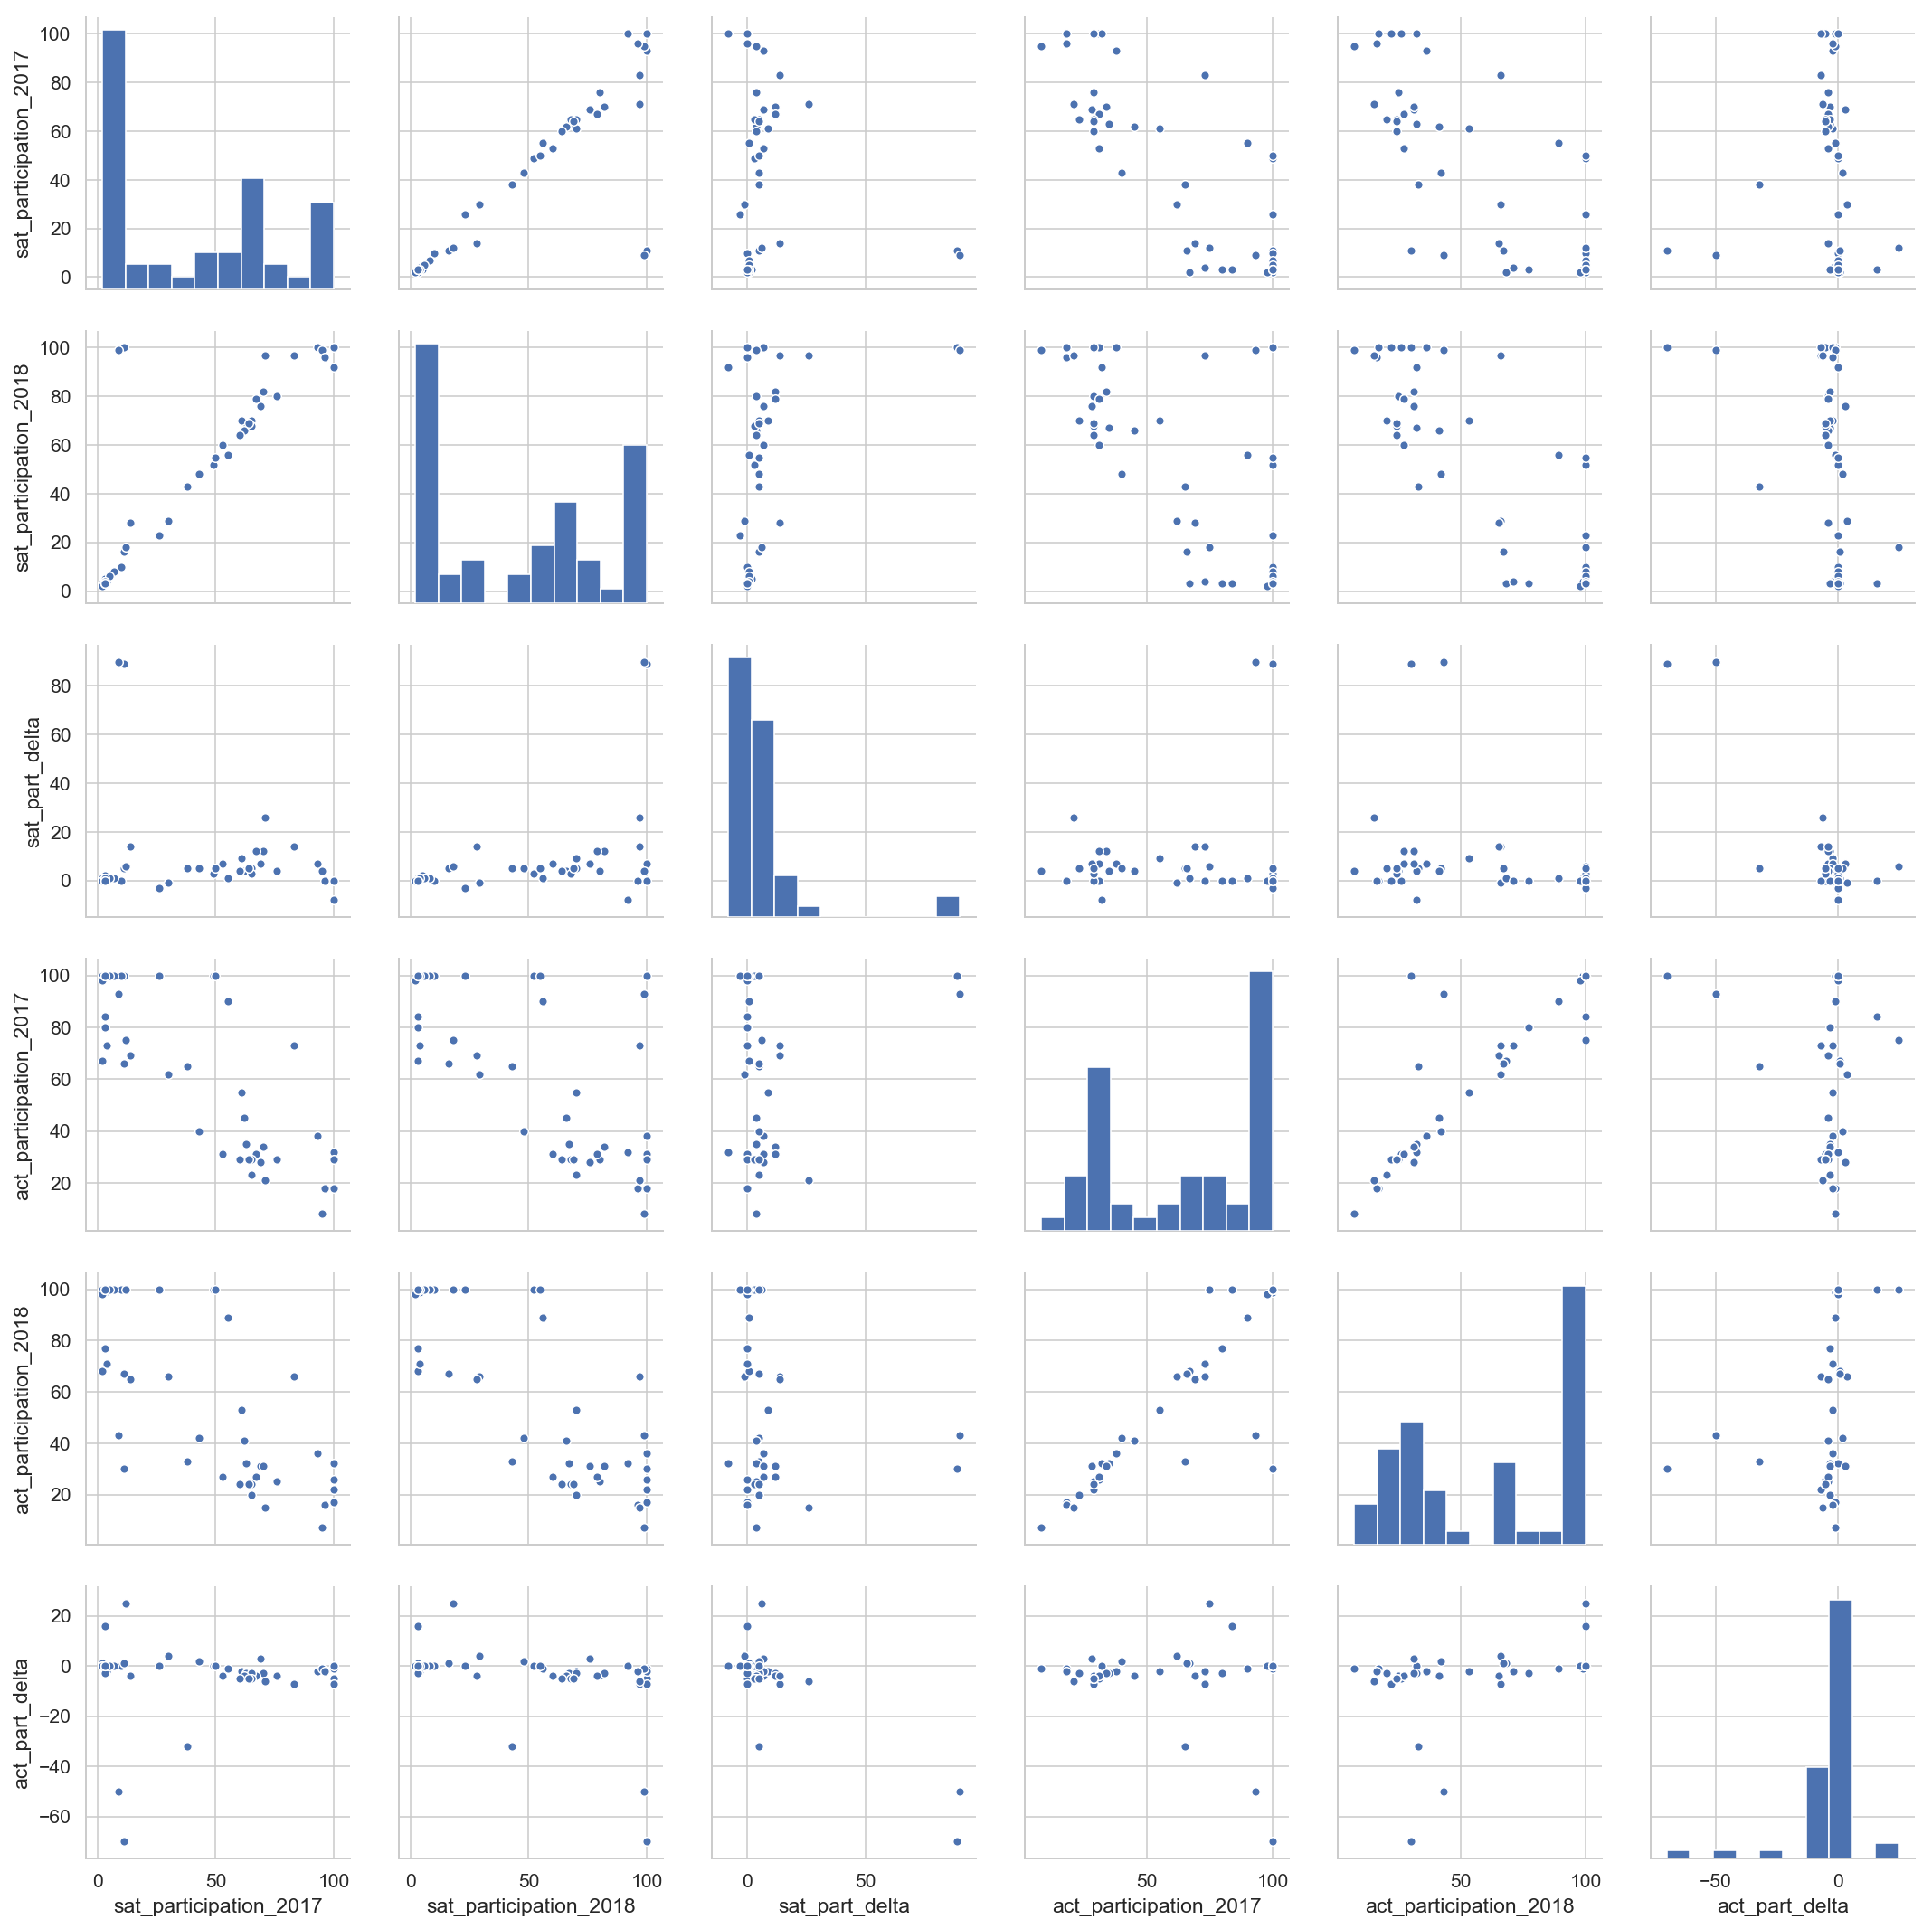

In [26]:
#dfsubsat = df[['sat_participation_2017', 'sat_participation_2018', 'sat_total_2017', 'sat_total_2018']]
dfsubc = df[['state', 'sat_participation_2017', 'sat_participation_2018', 'sat_part_delta', 'act_participation_2017', 'act_participation_2018', 'act_part_delta']]

#https://stackoverflow.com/questions/36220829/
#fine-control-over-the-font-size-in-seaborn-plots-for-academic-papers/36222162
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(12,12))
sns.pairplot(dfsubc);

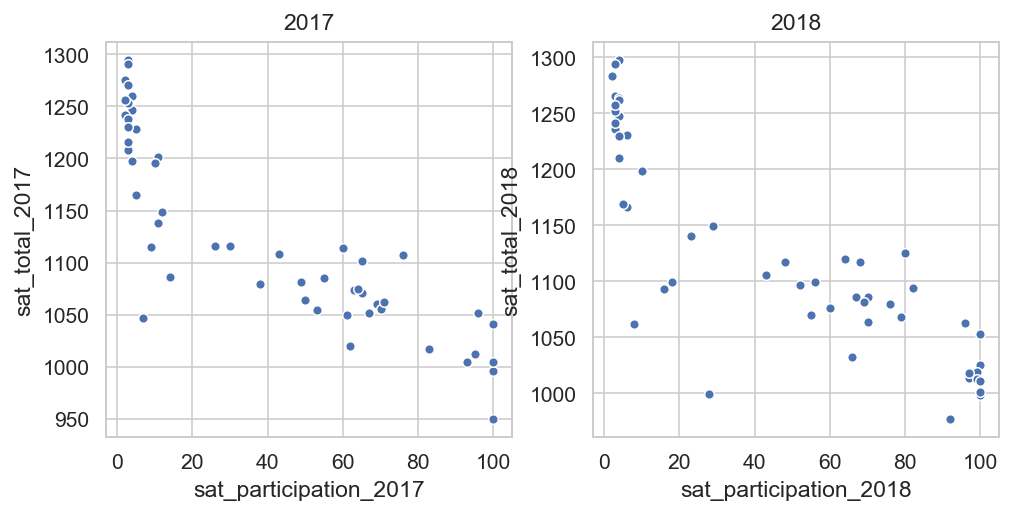

In [27]:
#Got hints from link provided
#https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes
plt.figure(1,   figsize=(8,8))
plt.subplot(221)
plt.title('2017')
sns.scatterplot(x=df.sat_participation_2017, y=df.sat_total_2017);


plt.subplot(222)
plt.title('2018')
sns.scatterplot(x=df.sat_participation_2018, y=df.sat_total_2018);
plt.show()

## Histograms
Let's look at histograms of the distribution participation rates:

(array([21.,  2.,  2.,  1.,  3.,  3.,  9.,  2.,  1.,  7.]),
 array([  2. ,  11.8,  21.6,  31.4,  41.2,  51. ,  60.8,  70.6,  80.4,
         90.2, 100. ]),
 <a list of 10 Patch objects>)

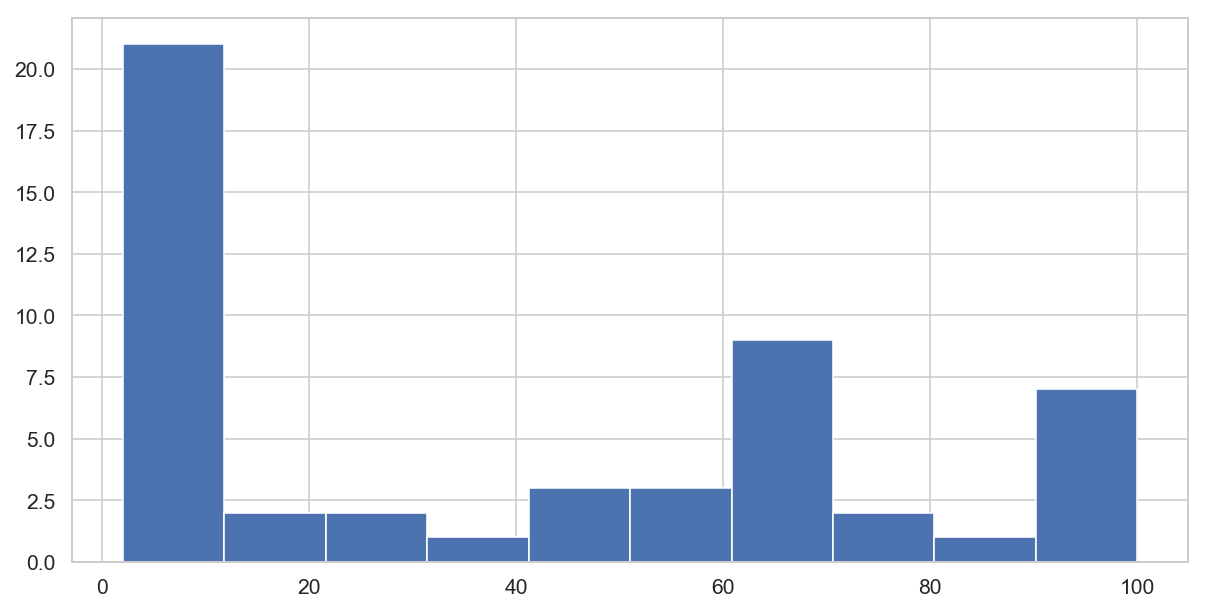

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.hist(df['sat_participation_2017'])

<Figure size 864x864 with 0 Axes>

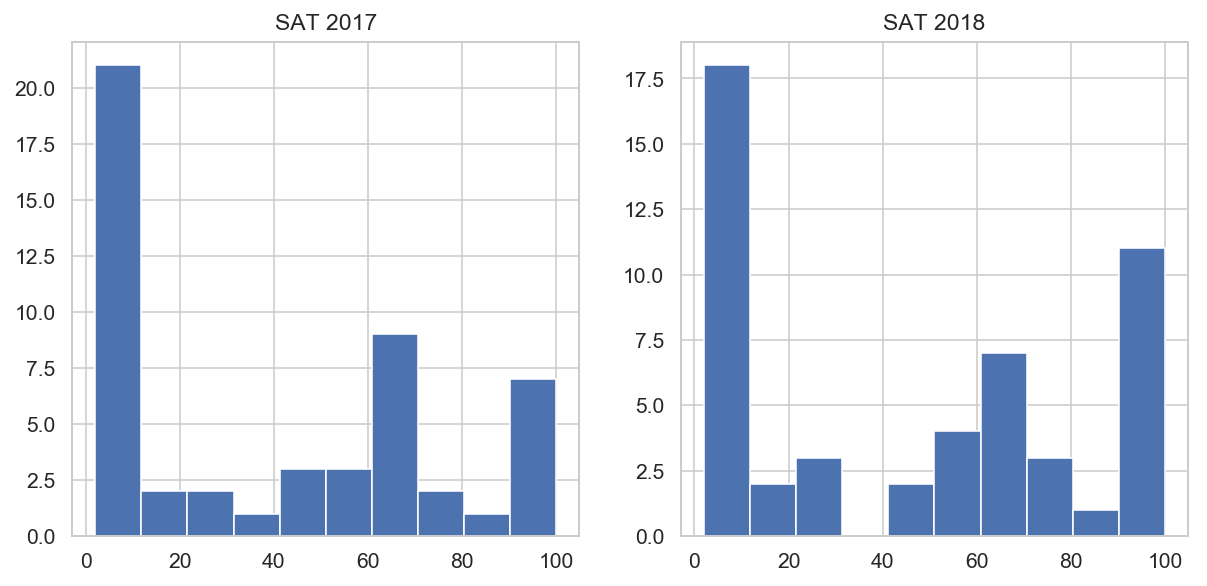

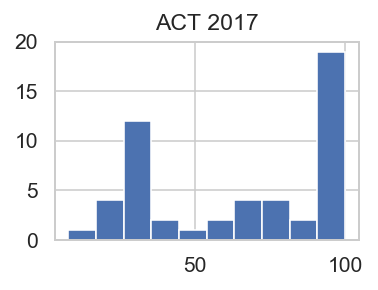

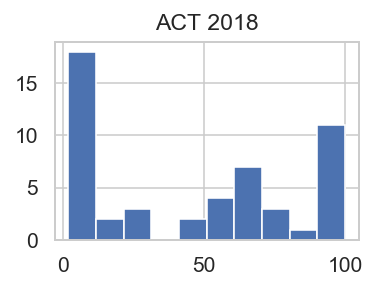

In [29]:
#fig, ax = plt.subplots(2,2, figsize=(8,8))
plt.figure(figsize=(12,12))

#Got hints from link provided
#https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes
##I'm not sure why it won't print nicely in a 2x2 grid
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.title('SAT 2017')
plt.hist(df['sat_participation_2017'])


plt.subplot(222)
plt.title('SAT 2018')
plt.hist(df['sat_participation_2018'])
plt.show()

plt.subplot(223)
plt.title('ACT 2017')
plt.hist(df['act_participation_2017'])
plt.show()

plt.subplot(224)
plt.title('ACT 2018')
plt.hist(df['sat_participation_2018'])
plt.show()

The above distributions for participation rates clearly show a large number of states with low SAT participation, and a large number of states with high ACT participation. It also illustrates that SAT participation went up slightly, while ACT participation went down. 

Next I plotted a series of boxplots to visualize the spread of the different results. I  first looked at all the columns, but the test scores do not have much bearing on the question I am trying to answer here, so I just included the boxplots for participation change.

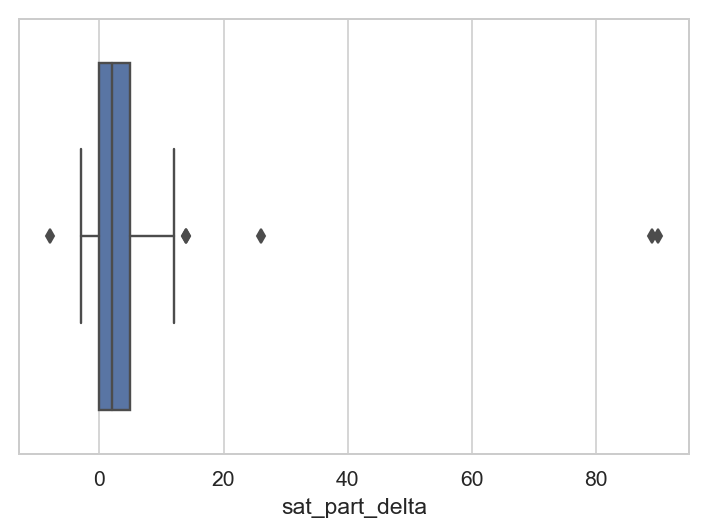

In [30]:
sns.boxplot(df.sat_part_delta)

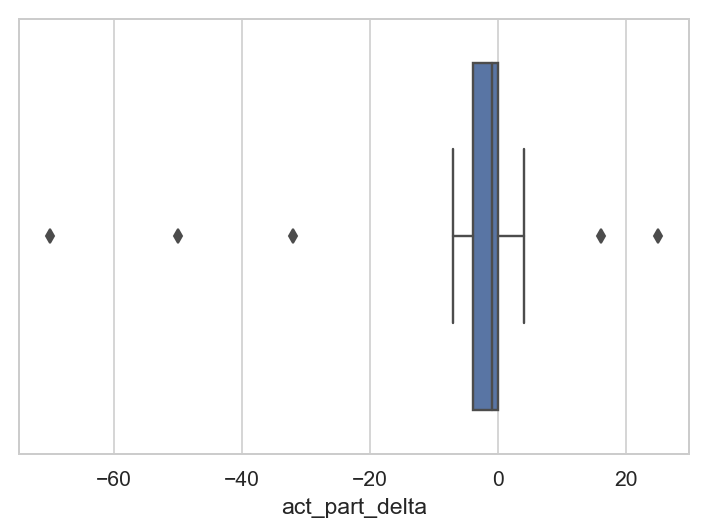

In [31]:
sns.boxplot(df.act_part_delta)

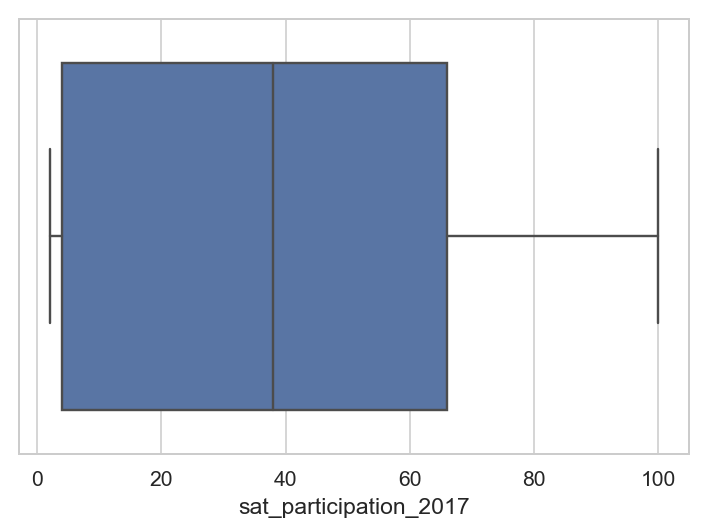

In [32]:
sns.boxplot(df['sat_participation_2017']);

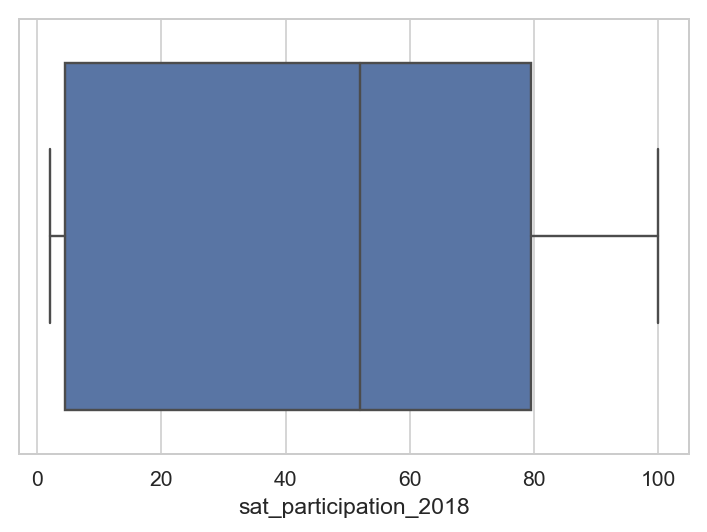

In [33]:
sns.boxplot(df['sat_participation_2018']);

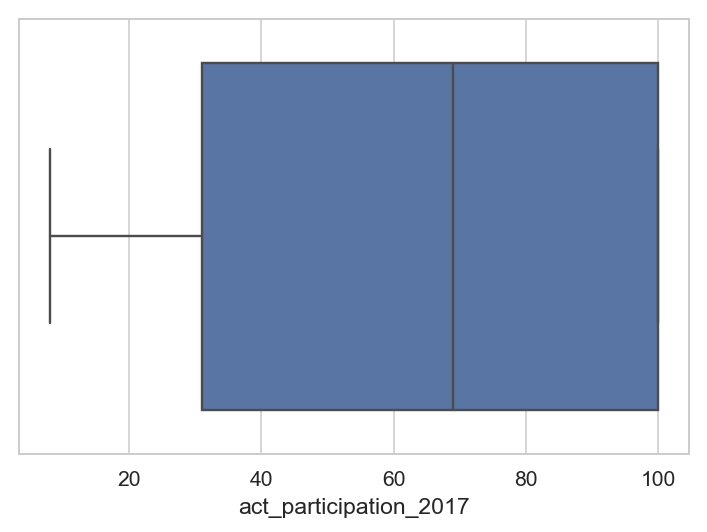

In [34]:
sns.boxplot(df['act_participation_2017']);

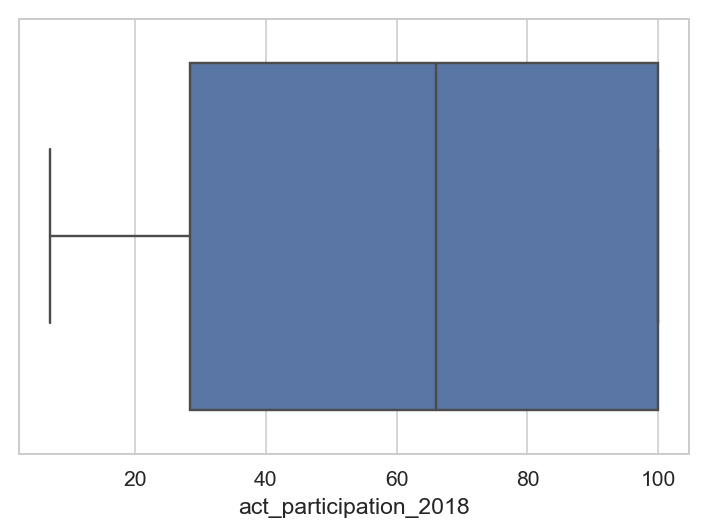

In [35]:
sns.boxplot(df['act_participation_2018']);


These reinforce what we saw earlier, that SAT participation increased overall, and that when you look at the rate of change the outliers are those states where they changed their testing requirement.

## Outside Research


The problem statement for this project was: Given changes in the SAT test itself, as well as the standardized testing landscape in general, how might College Board work to increase the participation rate?

In addition to what I was able to glean from the data itself, I used outside research to understand something about the factors that may influence test partication. I used materials from each of the test companies (ACT, and College Board for SAT), as well as information from a varierty of articles from different states that helped me understand what drives policy around standardized testing in the different states.

I learned that state policy plays an influential role in determining which students take which tests. Since 2009, when states began implementing a the common core curriculum, which includes mandatory testing, the landscape for standardized tests has been changing. On most issues related to education, states have the authority to set their own policies. This means that there is no uniform national policy when it comes to standardized testing. Some states (Massachusetts, for example) have implemented their own test. Others have puchased a common core specific test called Partnership for Assessment of Readiness for College and Careers (PARCC.) Still others have used the college entrance exams (SAT or ACT) to meet their testing requirements. From what I could tell, it seems that many states are still trying to figure this out. These changes in policy explain the changes we saw in Colorado and Illinois. Those states changed from using the SAT to using the ACT. The data showed how influential that policy decision was on participation rates of both tests.

I also learned that the college board has partnered with many states have offer incentives increase the participation rate. These include SAT School Days, where the test is offered free of charge to students, at their school, during school hours. Prior to these incentives, students had to take the SAT on a Saturday, often at a location other than their own school, and pay a fee. 




Sources used:
https://research.collegeboard.org/programs/sat/data
https://www.act.org/
https://www.chalkbeat.org/posts/co/2017/07/05/from-csap-to-parcc-heres-how-colorados-standardized-tests-have-changed-and-whats-next/
http://blogs.edweek.org/edweek/curriculum/2018/09/maryland_will_drop_the_parcc_c.html
https://parcc.pearson.com/
https://www2.ed.gov/admins/comm/choice/regprivschl/regprivschl.pdf
https://blog.prepscholar.com/which-states-require-the-sat
http://www.hotchalkeducationnetwork.com/common-core-history-timeline/




## Conclusion and Recommendation

In summary, in order to increase participation rates, I recommend that College Board to the following:

-  Follow Trends: Watch how the states are responding to common core
-  Build and Strenghten State Relationships - Help them meet succeed
-  Consider offering a common core test

I recommend that College Board continue to focus on building relationships with the state policy-makers. The data and the outside research suggest that state policy has a lot of influence in determining what tests students take. States are obviously sruggling with compliance with new rules, and are under pressure to prove their performance with good test scores. This presents a great opportunity for College Board to offer solutions to make it easier for the states to comply. I recommend they continue to offer incentives like the SAT School Days program, and look for additional ways their products can ease the growing burden on the states.

We have seen that increased participation results in decreased score averages. This makes sense, especially when the increases are due to mandatory requirements. If non-college bound students are less likely to be prepared for a college entrance exam. If they are forced to take a college entrance exam as a requirement for high-school graduation it would be expected that they score lower than college-bound students. 

College Board may want to explore offering a high-school graduation test that is more focused on the common core curriculum, in addition to the SAT. They coud then define participation rate as the total number of students taking a College Board test, and they could look at average scores of each test separately. I believe this would help them increase the particpation rate drastically, and improve the averages on test scores.

 




